In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
abalone = pd.read_csv('abalone/abalone.data')

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
abalone.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


#### check rows for missing, na or null values. if found, chuck 'em

In [5]:
# Check for missing values in the entire DataFrame
missing_values = abalone.isnull().sum()
print(missing_values)

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64


In [6]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
abalone.columns = column_names
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


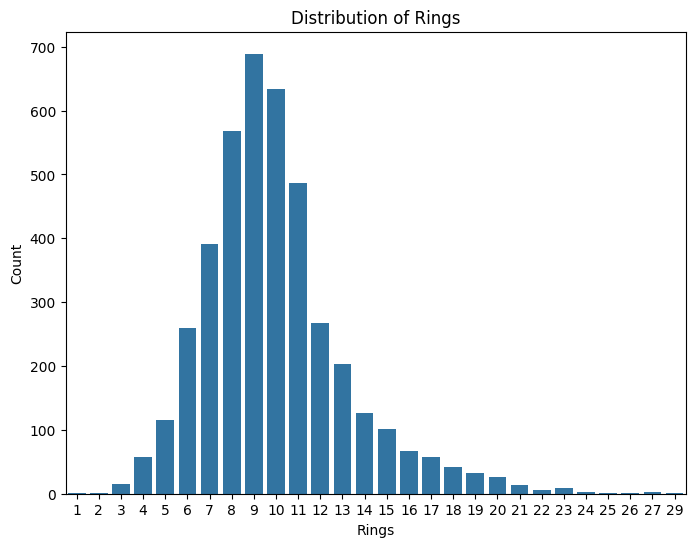

In [7]:
# Plot the distribution of the 'class' feature (11 Rings And Up vs. Below 11 Rings)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

#### Drop the rows where infant is the sex because they have ages below 11 and would skew the later binary split

In [8]:
# Filter the dataset for infants
infants = abalone[abalone['Sex'] == 'I']

# Calculate the average ring age for infants
average_ring_age_infants = infants['Rings'].mean()

print(f'The average ring age for infants is: {average_ring_age_infants:.2f}')

The average ring age for infants is: 7.89


In [9]:
# Drop rows where the 'Sex' is 'I'
abalone_no_infants = abalone[abalone['Sex'] != 'I']

In [10]:
print(abalone_no_infants.head())
print(abalone_no_infants.shape)

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
5   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
6   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   

   Shell_weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
5         0.330     20  
6         0.260     16  
(2834, 9)


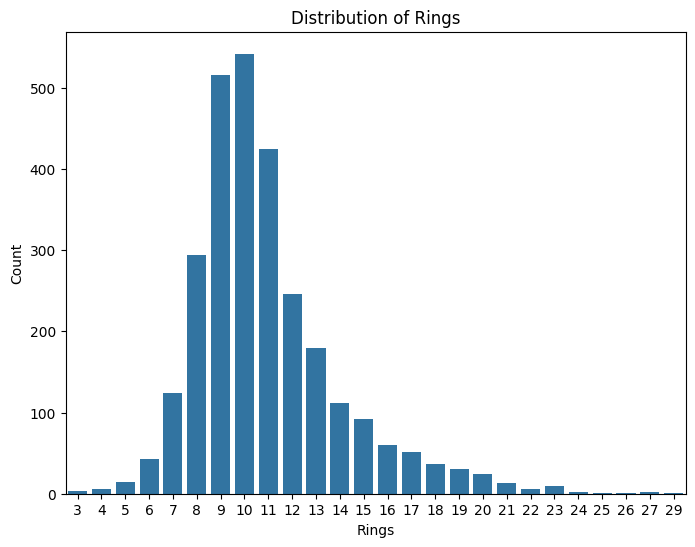

In [11]:
# Plot the distribution of the 'class' feature (edible vs. poisonous)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone_no_infants, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [12]:
abalone = abalone_no_infants

#### Considering how counts drop significantly after age 11, we use threshold age of 11 to do a binary split on the rings age.

In [13]:
# Create the binary target variable, 1 if old, 0 if not
abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)
abalone

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/131238396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1
...,...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [14]:
abalone['11_Rings_Or_More'].value_counts()

11_Rings_Or_More
0    1543
1    1291
Name: count, dtype: int64

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/707345489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')


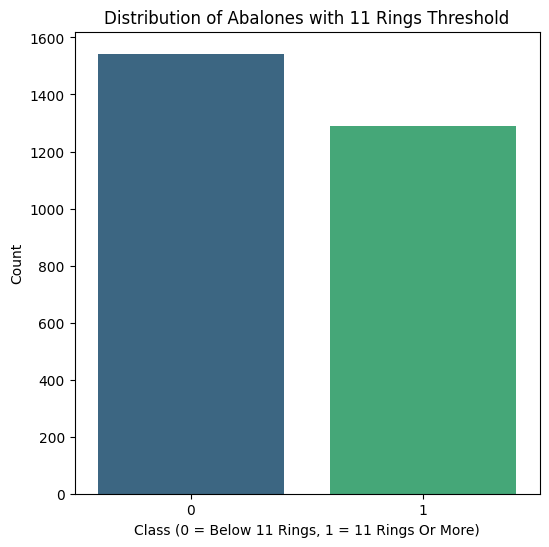

In [15]:
# Visualize the distribution of the binary target variable 'Old'
plt.figure(figsize=(6, 6))
sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')
plt.title('Distribution of Abalones with 11 Rings Threshold')
plt.xlabel('Class (0 = Below 11 Rings, 1 = 11 Rings Or More)')
plt.ylabel('Count')
plt.show()

#### One-hot-encode the Sex column

In [16]:
abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first=True)
abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,True
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,True
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,False
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,False


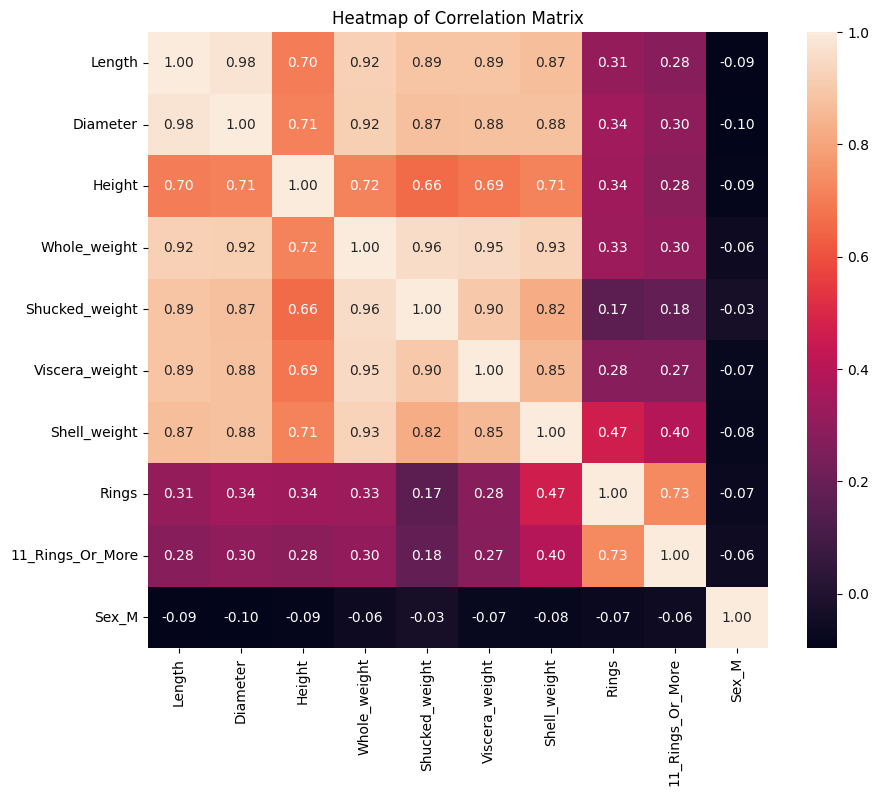

In [17]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = abalone.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

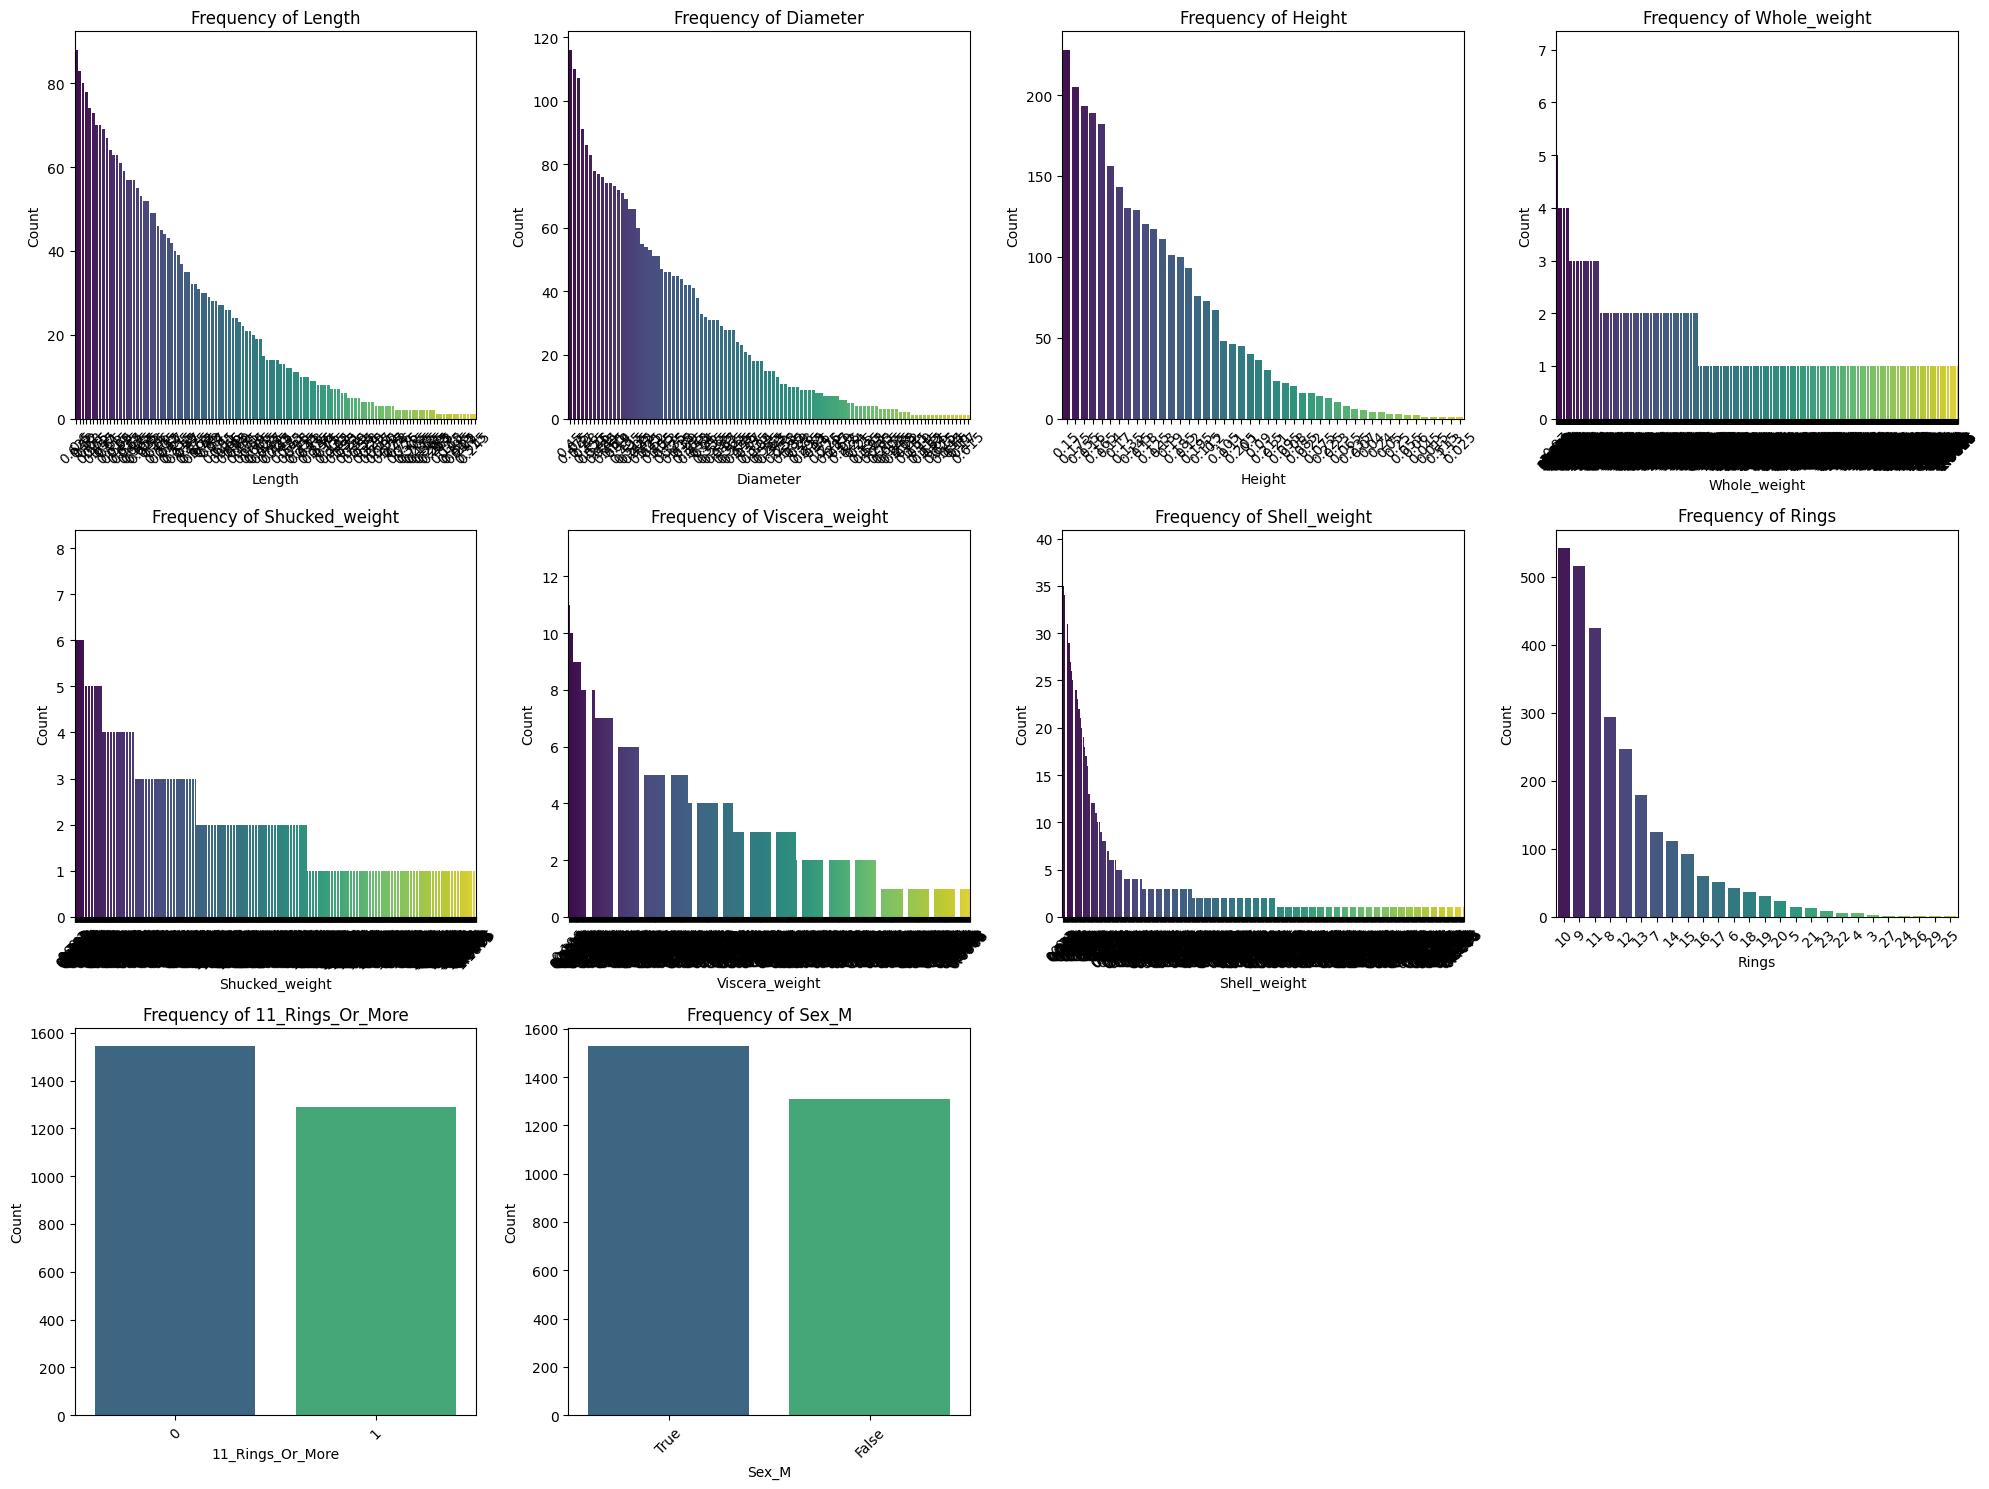

In [18]:
# Number of columns to display in the subplot grid
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(abalone.columns) + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot the frequency of categories for each feature as subplots
for i, column in enumerate(abalone.columns):
    sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Separate features and target
feature_variables = abalone.drop(columns=['Rings', '11_Rings_Or_More']) #X variable
target_variable = abalone['11_Rings_Or_More'] #Y variable

#### split train/test set

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split 20/80 test/train set
X_train, X_test, y_train, y_test = train_test_split(feature_variables, target_variable, test_size=0.2, random_state=428)

#### standardize the features

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Normal backprop

In [22]:
from tqdm import tqdm
import pyperch
import time

In [23]:
from pyperch.neural import backprop_nn

#### do initial exploration to see how many epochs are required to reduce runtime later - use 5 stratifiedKFolds

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.datasets import make_classification
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.neural.backprop_nn import BackpropModule 
from skorch.callbacks import EpochScoring

In [29]:
# Convert train/test set to appropriate data types (need float)
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

#### modify the BackpropModule class to take in multiple activation functions

In [32]:
class BackpropModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, dropout=0.5):
        super(BackpropModuleMODIFIED, self).__init__()
        self.layers = nn.ModuleList()
        self.activation = activation_function()
        self.dropout = nn.Dropout(p=dropout)

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))

    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(1, len(self.layers) - 1):
            X = self.activation(self.layers[i](X))
            X = self.dropout(X)
        X = self.layers[-1](X)
        return X

#### in paper explain why F1 (macro) over micro, weighted, samples. use max_epochs=200 (from prev paper knew that but shouldnt mention it again)

In [43]:
# Define the neural network with skorch and BackpropModule - use F1 score
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=BackpropModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=200,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            lr=0.05,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        losses_per_epoch.append(net.history[-1, 'train_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_losses = np.mean(losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_losses, avg_runtimes)

Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [00:18, 18.40s/it]
relu CV Folds: 2it [00:40, 20.82s/it]
relu CV Folds: 3it [01:02, 21.14s/it]
relu CV Folds: 4it [01:23, 20.95s/it]
relu CV Folds: 5it [01:46, 21.72s/it]
Activation Functions:  33%|███████▎              | 1/3 [01:46<03:32, 106.41s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [00:21, 21.28s/it]
sigmoid CV Folds: 2it [00:42, 21.04s/it]
sigmoid CV Folds: 3it [01:04, 21.42s/it]
sigmoid CV Folds: 4it [01:24, 20.93s/it]
sigmoid CV Folds: 5it [01:44, 20.70s/it]
Activation Functions:  67%|██████████████▋       | 2/3 [03:30<01:45, 105.33s/it]
tanh CV Folds: 0it [00:00, ?it/s]
tanh CV Folds: 1it [00:21, 21.87s/it]
tanh CV Folds: 2it [00:42, 21.14s/it]
tanh CV Folds: 3it [01:03, 21.27s/it]
tanh CV Folds: 4it [01:24, 21.08s/it]
tanh CV Folds: 5it [01:45, 20.82s/it]
Activation Functions: 100%|██████████████████████| 3/3 [05:16<00:00

In [44]:
net.fit(X_train_scaled, y_train)
y_proba_train = net.predict_proba(X_train_scaled)

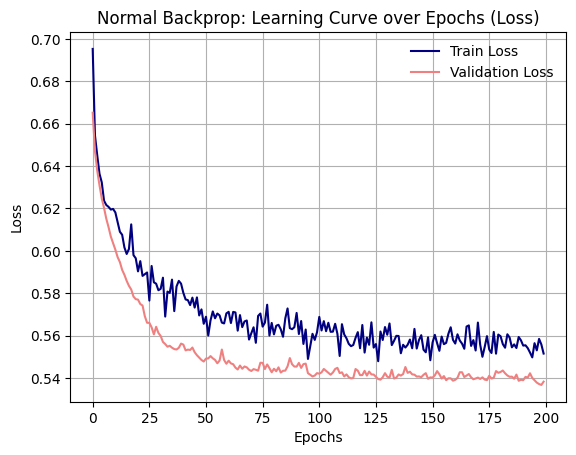

In [47]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Normal Backprop: Learning Curve over Epochs (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

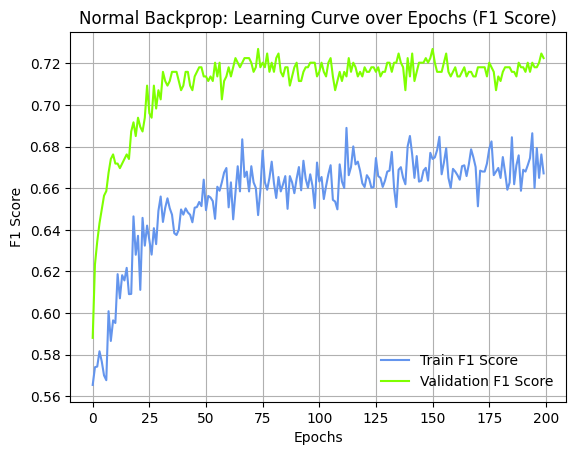

In [48]:
# plot the iterative learning curve (F1_score)
plt.plot(net.history[:, 'train_acc'], label='Train F1 Score', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation F1 Score', color='chartreuse')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Normal Backprop: Learning Curve over Epochs (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)

#### rerun normal backprop to get stats for plotting activation functions on same plot 

In [53]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=BackpropModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=500,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            lr=0.05,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(net.history[:, 'train_loss'])
        valid_losses_per_epoch.append(net.history[:, 'valid_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(train_losses_per_epoch, axis=0)
    avg_valid_losses = np.mean(valid_losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_train_losses, avg_valid_losses, avg_runtimes)


Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [00:49, 49.75s/it]
relu CV Folds: 2it [01:38, 49.06s/it]
relu CV Folds: 3it [02:28, 49.34s/it]
relu CV Folds: 4it [03:17, 49.28s/it]
relu CV Folds: 5it [04:07, 49.47s/it]
Activation Functions:  33%|███████▎              | 1/3 [04:07<08:14, 247.05s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [00:49, 49.17s/it]
sigmoid CV Folds: 2it [01:37, 48.70s/it]
sigmoid CV Folds: 3it [02:27, 49.05s/it]
sigmoid CV Folds: 4it [03:18, 49.91s/it]
sigmoid CV Folds: 5it [04:05, 49.07s/it]
Activation Functions:  67%|██████████████▋       | 2/3 [08:12<04:06, 246.36s/it]
tanh CV Folds: 0it [00:00, ?it/s]
tanh CV Folds: 1it [00:49, 49.37s/it]
tanh CV Folds: 2it [01:38, 49.08s/it]
tanh CV Folds: 3it [02:28, 49.52s/it]
tanh CV Folds: 4it [03:16, 49.03s/it]
tanh CV Folds: 5it [04:07, 49.65s/it]
Activation Functions: 100%|██████████████████████| 3/3 [12:20<00:00

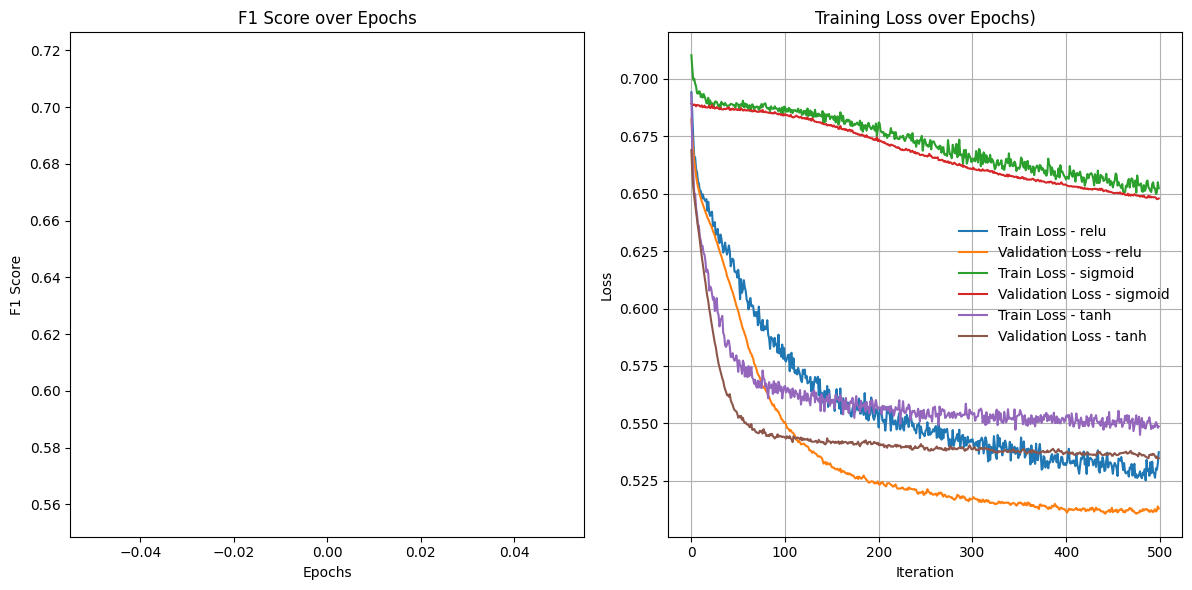

In [56]:
 # Plot F1 Score, Loss, and Runtime curves for each activation function
plt.figure(figsize=(18, 6))

for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.subplot(1, 3, 1)
    plt.plot(f1_scores, label=f'{activation_name}')
    plt.title('F1 Score over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')

    plt.subplot(1, 3, 2)
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs)")
    plt.grid(visible=True)
    plt.legend(frameon=False)

plt.tight_layout()
plt.show()

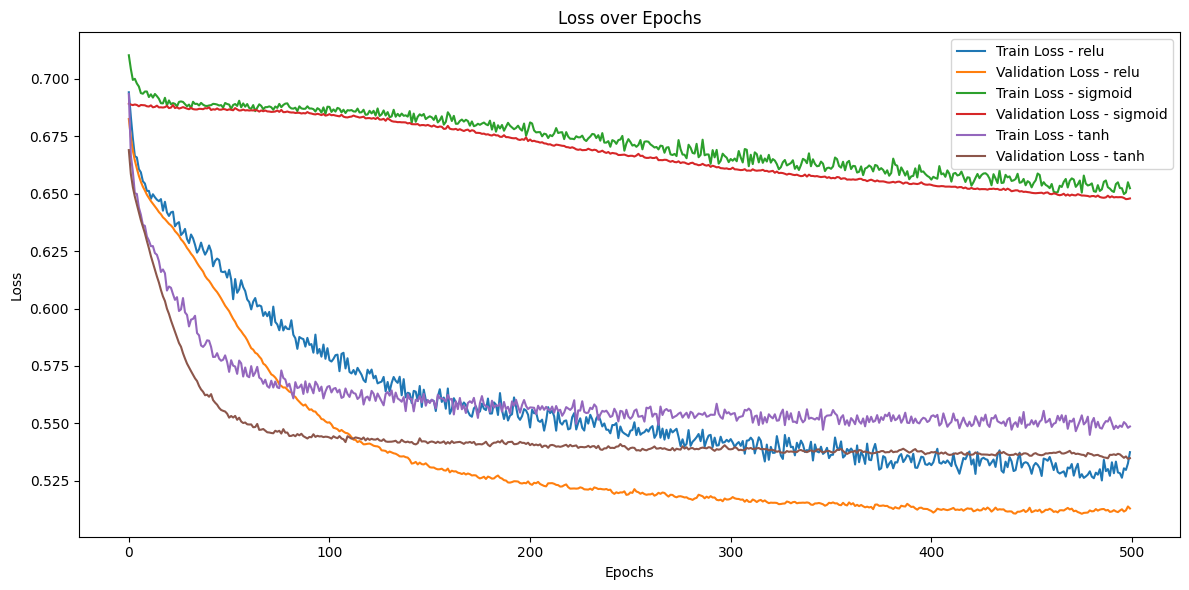

In [60]:
# Training and Validation Loss over epochs
plt.figure(figsize=(12, 6))
for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### determine best activation function with a design matrix (multiple activation functions against multiple cv folds) - because convergence is quick, can lower it down to 50

In [62]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function):
    return NeuralNetClassifier(
        module=BackpropModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        max_epochs=50,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        lr=0.05,
        iterator_train__shuffle=True,
    )

# Parameters
activation_functions_list = ['relu', 'sigmoid', 'tanh']
cv_folds_list = [3, 5, 7, 10]

results = []

for activation in tqdm(activation_functions_list, desc="Activations"):
    for cv_folds in tqdm(cv_folds_list, desc=f'Activation: {activation}, Fold: {cv_folds}', leave=False):
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        val_f1_scores = []
        runtimes = []
        
        for train_index, val_index in skf.split(X_train_scaled, y_train):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            net = create_model(X_train_fold.shape[1], 2, 30, 1, activation_functions[activation])
            
            start_time = time.time()
            net.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            runtime = end_time - start_time
            runtimes.append(runtime)

            y_pred = net.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_pred)
            val_f1_scores.append(val_f1)

        mean_f1_score = np.mean(val_f1_scores)
        mean_runtime = np.mean(runtimes)
        results.append({'activation': activation, 'cv_folds': cv_folds, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})

results_df = pd.DataFrame(results)
print(results_df)

Activations: 100%|███████████████████████████████| 3/3 [06:30<00:00, 130.25s/it]

   activation  cv_folds  mean_f1_score  mean_runtime (s)
0        relu         3       0.580476          4.553901
1        relu         5       0.594022          4.935467
2        relu         7       0.627121          5.444523
3        relu        10       0.616164          5.357302
4     sigmoid         3       0.000000          3.974512
5     sigmoid         5       0.000000          4.803298
6     sigmoid         7       0.070561          5.574973
7     sigmoid        10       0.000000          5.442683
8        tanh         3       0.653522          4.557365
9        tanh         5       0.657691          4.832269
10       tanh         7       0.657781          5.284730
11       tanh        10       0.652928          5.495986


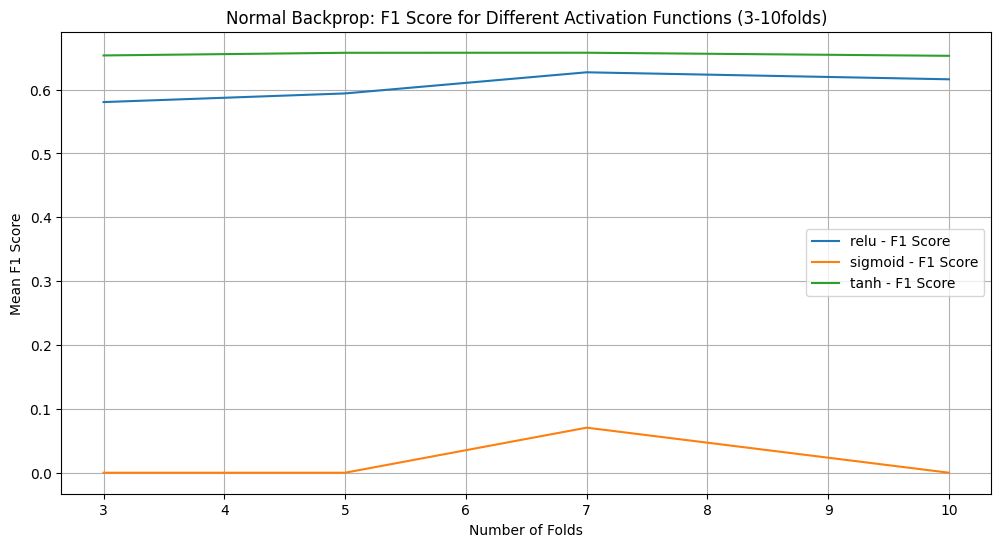

Best Activation Function: tanh with F1 Score: 0.657781168349785


In [64]:
# Plot results
plt.figure(figsize=(12, 6))
for activation in activation_functions_list:
    subset = results_df[results_df['activation'] == activation]
    plt.plot(subset['cv_folds'], subset['mean_f1_score'], label=f'{activation} - F1 Score')
plt.xlabel('Number of Folds')
plt.ylabel('Mean F1 Score')
plt.title('Normal Backprop: F1 Score for Different Activation Functions (3-10folds)')
plt.legend()
plt.grid()
plt.show()

# Print the best activation function
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Activation Function: {best_result['activation']} with F1 Score: {best_result['mean_f1_score']}")


#### tanh appears to be the best activation function, since its F1 score are constant regardless of CV, and consistently outperforms sigmoid and relu functions

#### setting tanh as the activation function, run a mini gridsearch (using a hyperparameter grid) to do a broad analysis on ideal layers

Architecture: 100%|███████████████████████████████| 4/4 [01:36<00:00, 24.22s/it]


     architecture  mean_f1_score  mean_runtime (s)
0        [64, 32]       0.663782          4.306290
1       [128, 64]       0.667412          4.167573
2  [256, 128, 64]       0.676446          7.405381
3    [32, 32, 32]       0.649673          3.416292


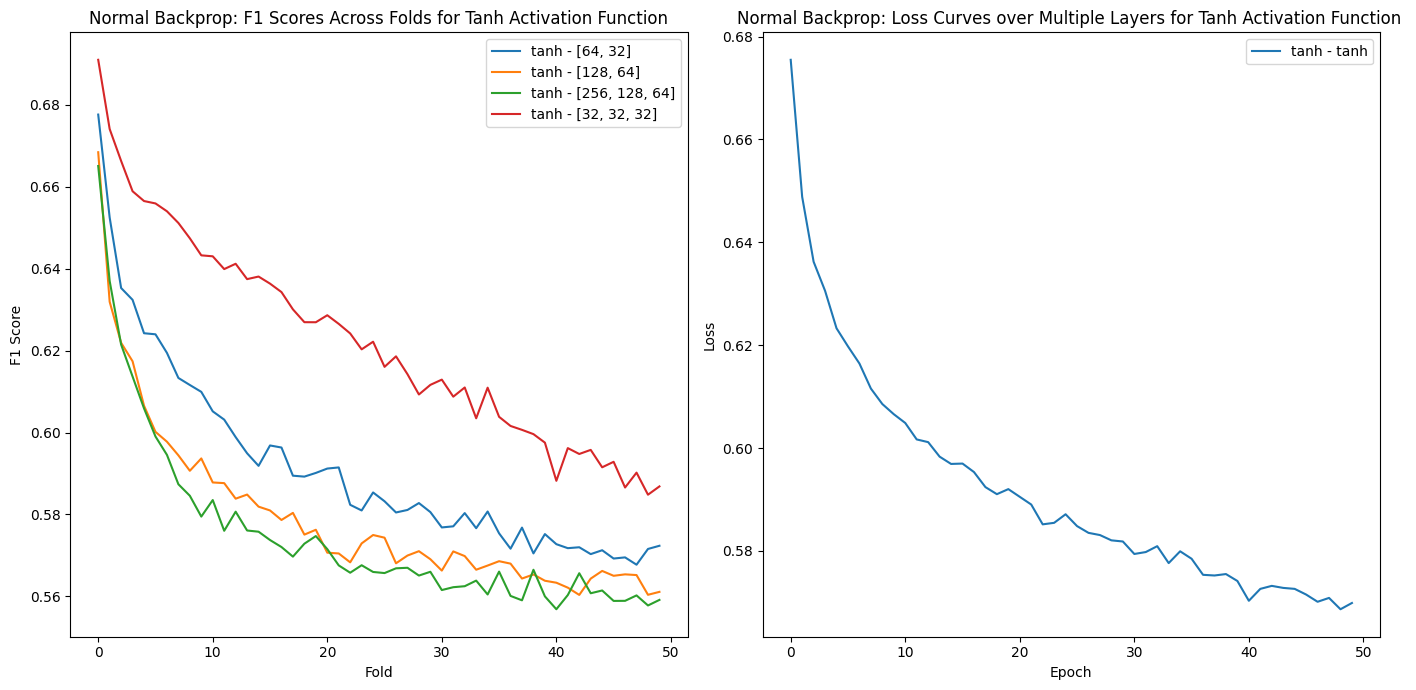

Best Architecture: [256, 128, 64] with F1 Score: 0.6764463996554061


In [65]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh):
    return NeuralNetClassifier(
        module=BackpropModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        max_epochs=50,
        verbose=0,
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        lr=0.05,
        iterator_train__shuffle=True,
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.history[:, 'train_loss'])
    
    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [64, 32],
    [128, 64],
    [256, 128, 64],
    [32, 32, 32]
]
cv_folds = 5  # Use 5-fold cross-validation

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, nn.Tanh, cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"tanh - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('Normal Backprop: F1 Scores Across Folds for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each architecture
plt.subplot(1, 2, 2)
for architecture, loss_histories in all_loss_histories.items():
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'tanh - {architecture}')

plt.title('Normal Backprop: Loss Curves over Multiple Layers for Tanh Activation Function ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")


#### finer grain search on ideal layer size. found that [32, 32, 32] is ok

Architecture: 100%|███████████████████████████████| 9/9 [03:34<00:00, 23.86s/it]


   architecture  mean_f1_score  mean_runtime (s)
0      [64, 64]       0.658379          3.728607
1  [16, 16, 16]       0.643259          6.304426
2      [16, 32]       0.653867          4.538226
3      [16, 16]       0.654156          3.663270
4      [64, 64]       0.669157          5.013773
5     [64, 128]       0.663586          5.576041
6  [16, 32, 64]       0.648977          4.591603
7  [16, 32, 32]       0.642692          4.654156
8  [32, 32, 32]       0.655315          4.616167


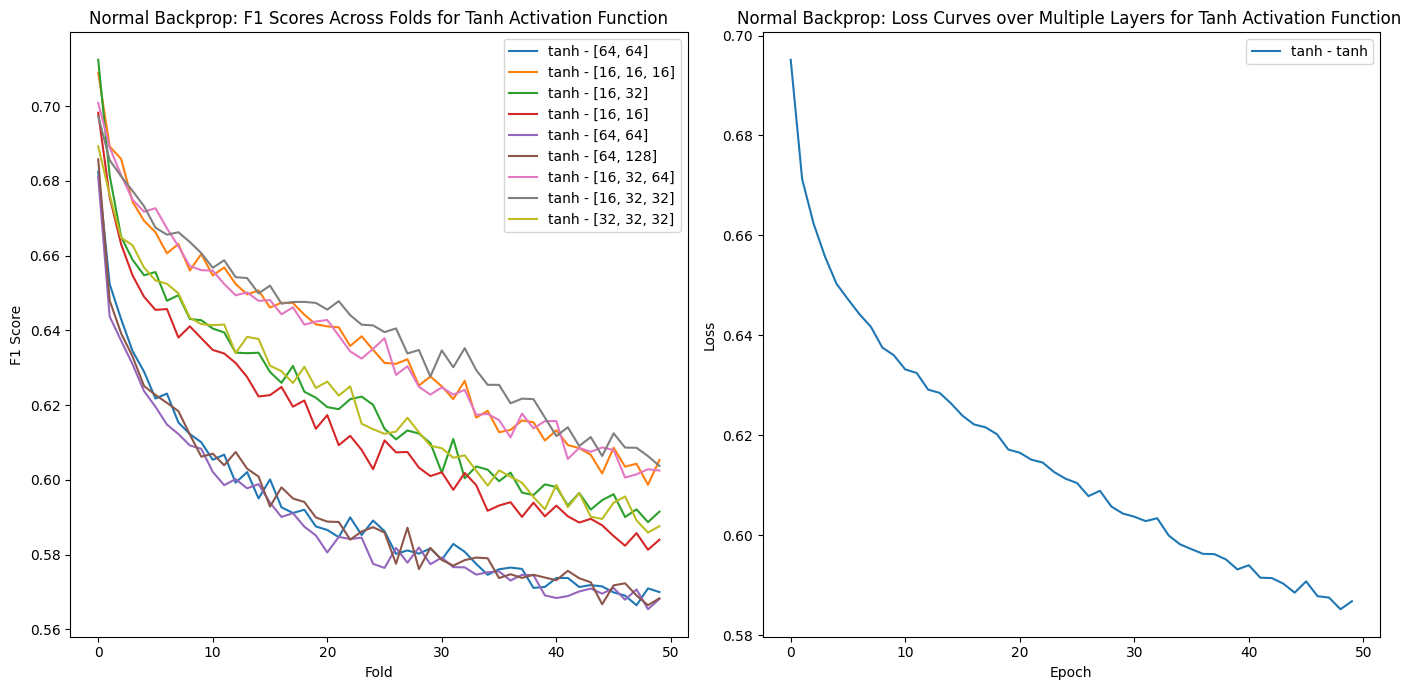

Best Architecture: [64, 64] with F1 Score: 0.6691565302410855


In [66]:
def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.history[:, 'train_loss'])
    
    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [64, 64],
    [16, 16, 16],
    [16, 32],
    [16, 16],
    [64, 64],
    [64, 128],
    [16, 32, 64],
    [16, 32, 32],
    [32, 32, 32],
]
cv_folds = 5  # Use 5-fold cross-validation

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, nn.Tanh, cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

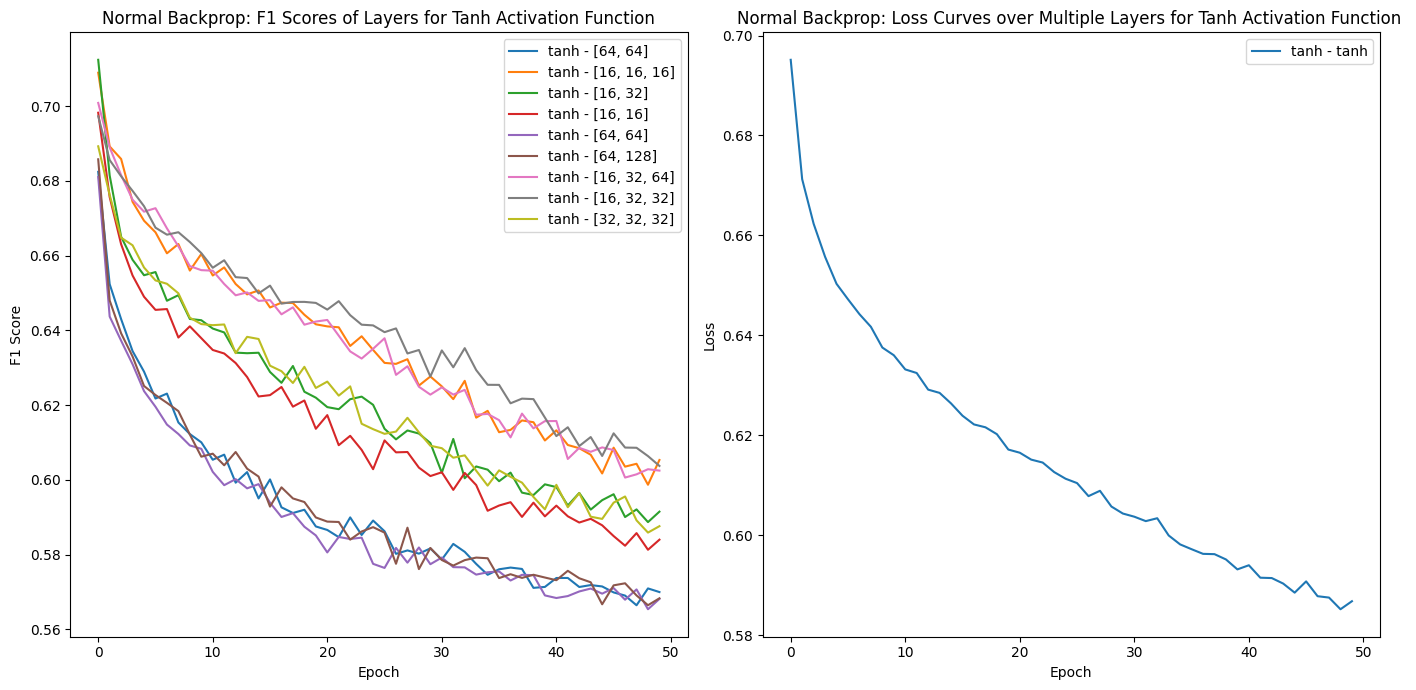

Best Architecture: [64, 64] with F1 Score: 0.6691565302410855


In [67]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"tanh - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('Normal Backprop: F1 Scores of Layers for Tanh Activation Function')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each architecture
plt.subplot(1, 2, 2)
for architecture, loss_histories in all_loss_histories.items():
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'tanh - {architecture}')

plt.title('Normal Backprop: Loss Curves over Multiple Layers for Tanh Activation Function ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")

#### having gotten an idea of what layer size is good, experiment with learning rate 

Learning Rates: 100%|█████████████████████████████| 8/8 [01:33<00:00, 11.69s/it]


  architecture  learning_rate  mean_f1_score  mean_runtime (s)
0     [64, 64]          0.001       0.590061          3.584554
1     [64, 64]          0.010       0.599763          2.241192
2     [64, 64]          0.050       0.636822          2.144188
3     [64, 64]          0.100       0.656967          2.011910
4     [64, 64]          0.250       0.688623          1.961252
5     [64, 64]          0.500       0.669949          2.102727
6     [64, 64]          0.750       0.666277          2.179379
7     [64, 64]          1.000       0.687186          1.829790
Best Learning Rate: 0.25 with F1 Score: 0.6886230190195842


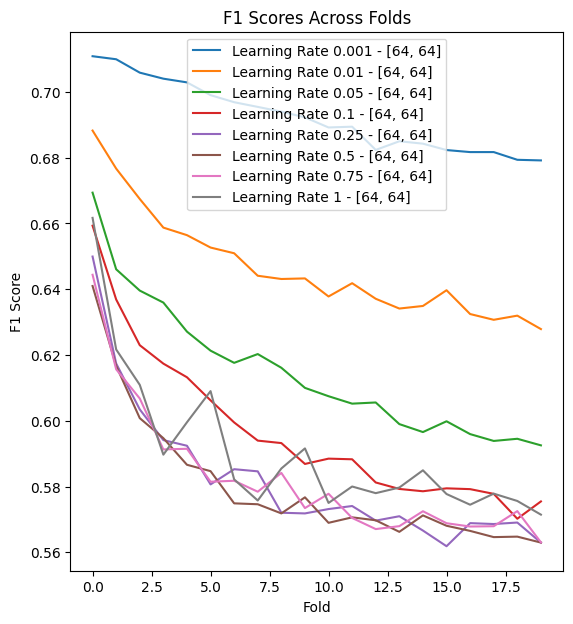

In [70]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, lr=0.05):
    return NeuralNetClassifier(
        module=BackpropModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        max_epochs=20,
        verbose=0,
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        lr=lr,
        iterator_train__shuffle=True,
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, lr, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation, lr)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.history[:, 'train_loss'])
    
    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define learning rates and architecture
architectures = [[64, 64]]
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
cv_folds = 5  # Use 5-fold cross-validation

results = []
all_f1_scores = []
all_loss_histories = []

for lr in tqdm(learning_rates, desc='Learning Rates'):
    for architecture in tqdm(architectures, desc=f'Tanh Architectures', leave=False):
        mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, nn.Tanh, lr, cv_folds)
        results.append({'architecture': architecture, 'learning_rate': lr, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
        all_f1_scores.append({'architecture': architecture, 'learning_rate': lr, 'f1_scores': loss_history})
        all_loss_histories.append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"Learning Rate {result['learning_rate']} - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('F1 Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Print the best learning rate
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Learning Rate: {best_result['learning_rate']} with F1 Score: {best_result['mean_f1_score']}")


Best Learning Rate: 0.25 with F1 Score: 0.6886230190195842


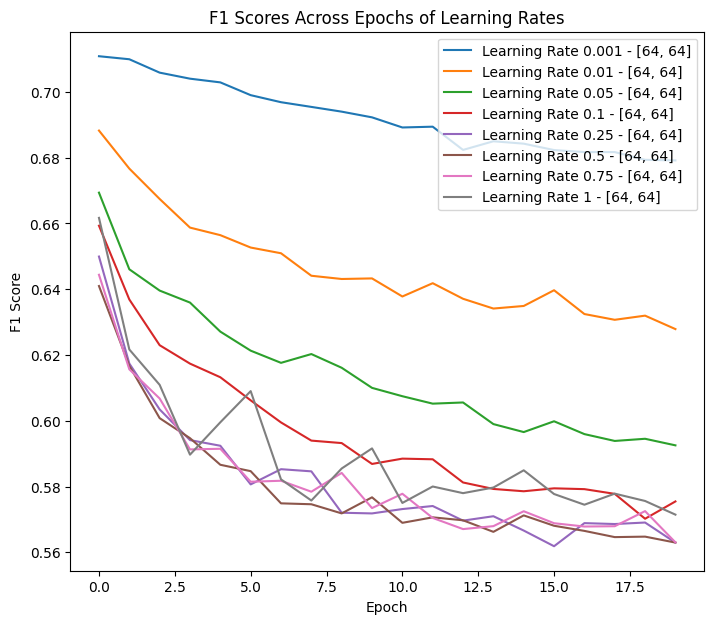

In [73]:

# Plotting the results
plt.figure(figsize=(18, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"Learning Rate {result['learning_rate']} - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('F1 Scores Across Epochs of Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

# Print the best learning rate
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Learning Rate: {best_result['learning_rate']} with F1 Score: {best_result['mean_f1_score']}")


#### analyze normal backprop's performance with learning rate = 0.25, [64,64] layers, tanh activation function

Average F1 Score: 0.6854015593655809
Average Loss: 0.5512061791644072
Average Runtime: 6.600016641616821


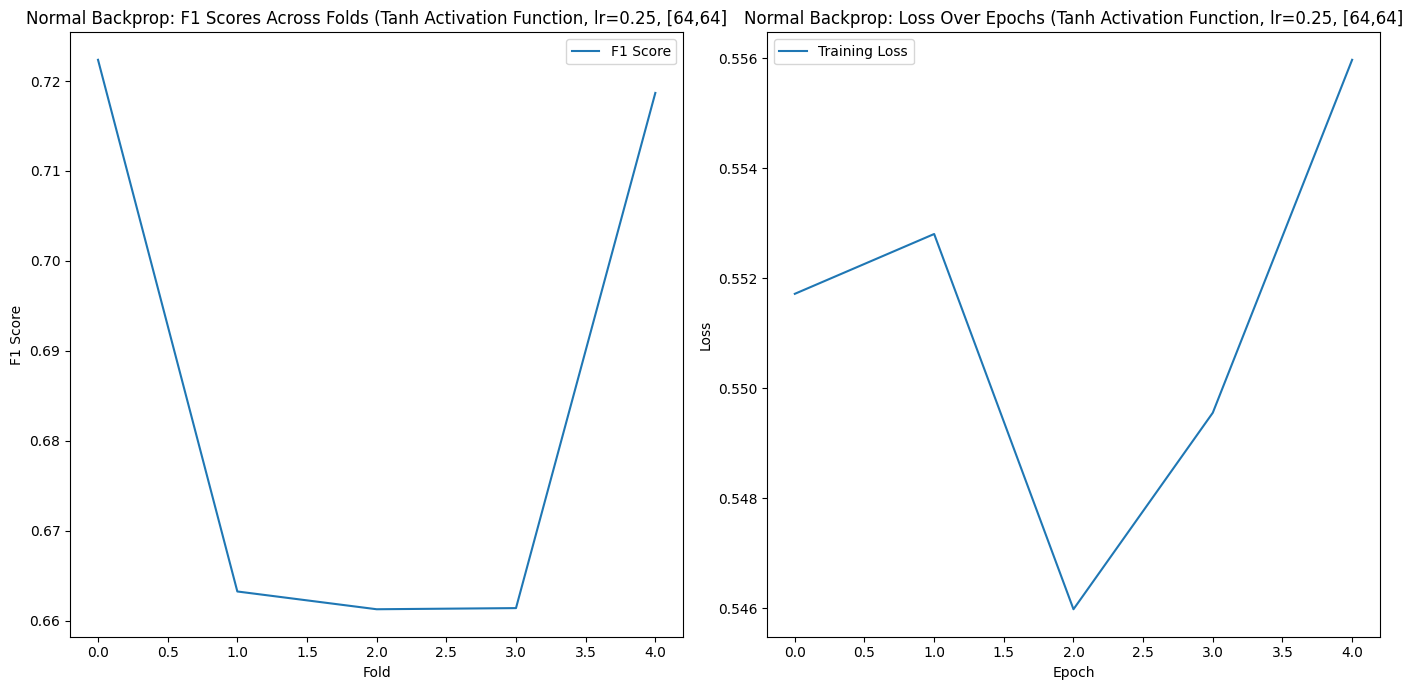

In [75]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, lr=0.25):
    return NeuralNetClassifier(
        module=BackpropModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        max_epochs=50,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        lr=lr,
        iterator_train__shuffle=True,
    )

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = []

f1_scores_per_epoch = []
losses_per_epoch = []
runtimes_per_epoch = []

for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc="Tanh CV Folds", leave=False):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    net = create_model(X_train_fold.shape[1], 2, 64, 1, nn.Tanh, 0.25)
    
    start_time = time.time()
    net.fit(X_train_fold, y_train_fold)
    end_time = time.time()
    
    runtime = end_time - start_time
    runtimes_per_epoch.append(runtime)
    
    y_pred = net.predict(X_val_fold)
    f1 = f1_score(y_val_fold, y_pred)
    f1_scores_per_epoch.append(f1)
    losses_per_epoch.append(net.history[-1, 'train_loss'])

avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
avg_losses = np.mean(losses_per_epoch, axis=0)
avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
histories = (avg_f1_scores, avg_losses, avg_runtimes)

print(f"Average F1 Score: {avg_f1_scores}")
print(f"Average Loss: {avg_losses}")
print(f"Average Runtime: {avg_runtimes}")

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot F1 scores over folds
plt.subplot(1, 2, 1)
plt.plot(f1_scores_per_epoch, label='F1 Score')
plt.title('Normal Backprop: F1 Scores Across Folds (Tanh Activation Function, lr=0.25, [64,64]')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(losses_per_epoch, label='Training Loss')
plt.title('Normal Backprop: Loss Over Epochs (Tanh Activation Function, lr=0.25, [64,64]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

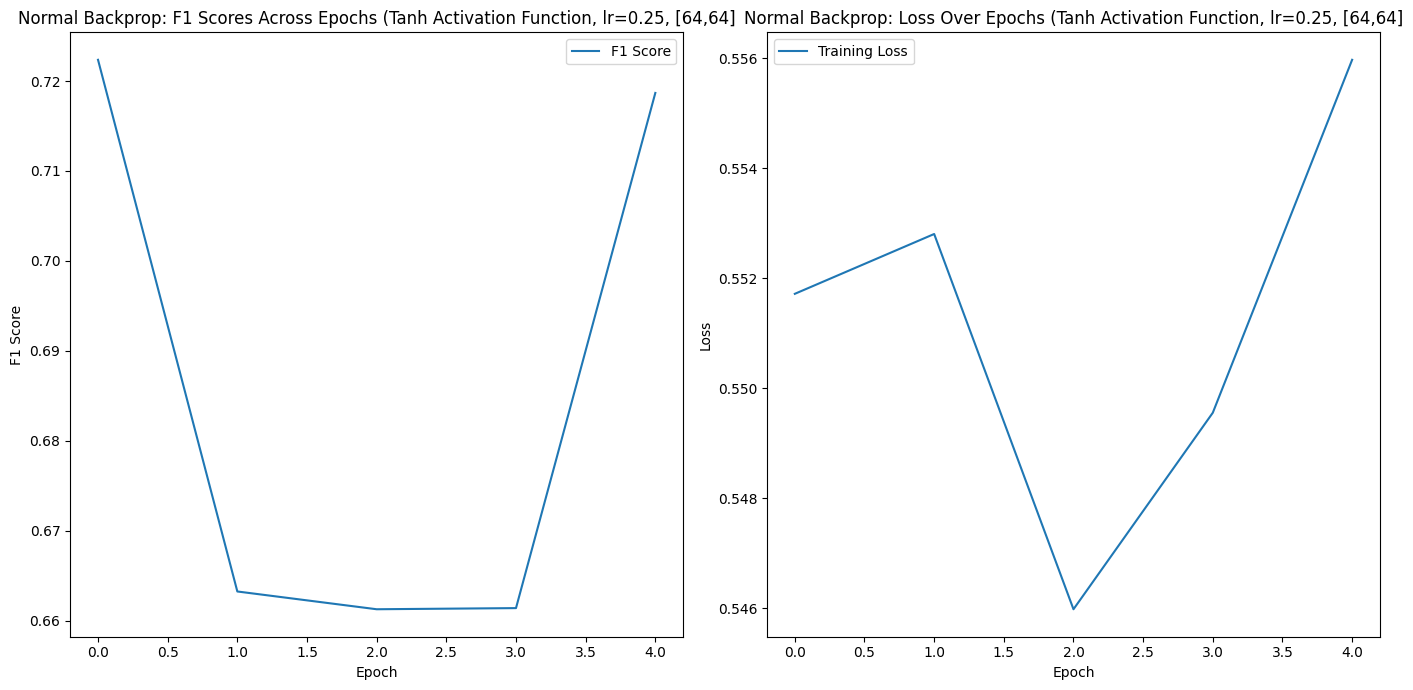

In [76]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plot F1 scores over folds
plt.subplot(1, 2, 1)
plt.plot(f1_scores_per_epoch, label='F1 Score')
plt.title('Normal Backprop: F1 Scores Across Epochs (Tanh Activation Function, lr=0.25, [64,64]')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(losses_per_epoch, label='Training Loss')
plt.title('Normal Backprop: Loss Over Epochs (Tanh Activation Function, lr=0.25, [64,64]')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
net.fit(X_train_scaled, y_train)
y_proba_train = net.predict_proba(X_train_scaled)

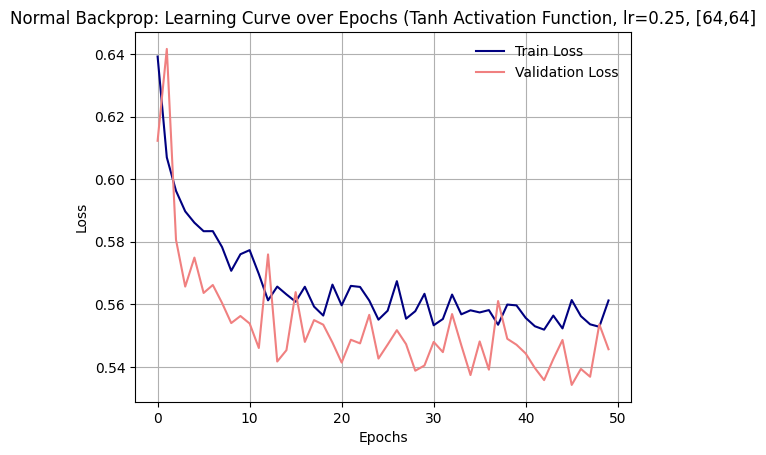

In [78]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Normal Backprop: Learning Curve over Epochs (Tanh Activation Function, lr=0.25, [64,64]")
plt.grid(visible=True)
plt.legend(frameon=False)

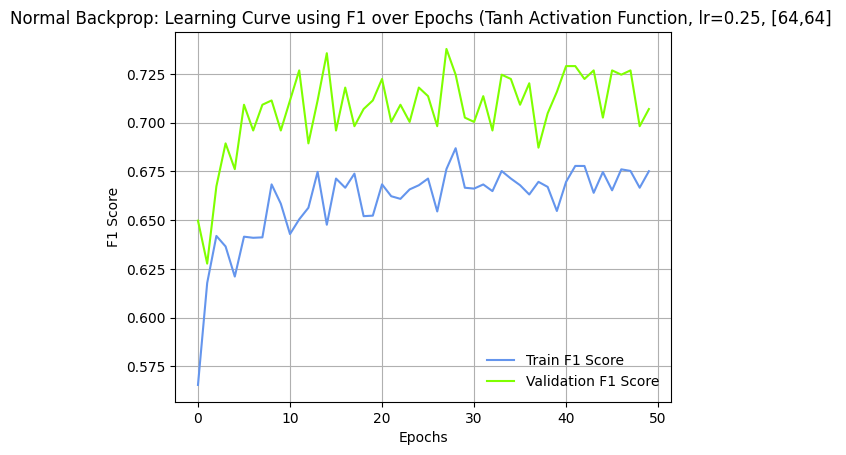

In [79]:
# plot the iterative learning curve (F1_score)
plt.plot(net.history[:, 'train_acc'], label='Train F1 Score', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation F1 Score', color='chartreuse')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Normal Backprop: Learning Curve using F1 over Epochs (Tanh Activation Function, lr=0.25, [64,64] ")
plt.grid(visible=True)
plt.legend(frameon=False)

#### Now that normal backprop has been done, proceed with using SA to discover good weights for NN 

## Simulated Annealing

In [74]:
from pyperch.neural.sa_nn import SAModule  

#### use seed=428 for SA, RHC and GA for reproducibility

In [81]:
SAModule.register_sa_training_step()

#### create a custom class to test activation functions

In [135]:
import torch
import torch.nn as nn
import numpy as np
import math

class SAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, t=10000, cooling=0.95, dropout=0, step_size=0.1, output_activation=nn.Softmax(dim=-1)):
        super(SAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.t = t
        self.cooling = cooling
        self.dropout = nn.Dropout(p=dropout)
        self.step_size = step_size
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def run_sa_single_step(self, net, X_train, y_train):
        net.save_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
        y_pred = net.infer(X_train, **{})
        loss = net.get_loss(y_pred, y_train, X_train, training=False)

        layer = np.random.randint(0, len(self.layers)-1)
        input_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[0])
        output_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[1])
        neighbor = self.step_size * np.random.choice([-1, 1])

        with torch.no_grad():
            net.module_.layers[layer].weight[input_dim][output_dim] += neighbor

        new_y_pred = net.infer(X_train, **{})
        new_loss = net.get_loss(new_y_pred, y_train, X_train, training=False)
        delta = new_loss - loss

        if new_loss > loss and np.random.rand() >= math.exp(-delta / self.t):
            net.load_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
            new_y_pred = y_pred
            new_loss = loss

        self.t = self.cooling * self.t
        return new_loss, new_y_pred

    @staticmethod
    def register_sa_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch, **fit_params):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_sa_single_step(self, Xi, yi, **fit_params)
            return {
                'loss': loss,
                'y_pred': y_pred,
            }


In [136]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=SAModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=200,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(net.history[:, 'train_loss'])
        valid_losses_per_epoch.append(net.history[:, 'valid_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(train_losses_per_epoch, axis=0)
    avg_valid_losses = np.mean(valid_losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_train_losses, avg_valid_losses, avg_runtimes)


Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [00:26, 26.78s/it]
relu CV Folds: 2it [00:52, 26.32s/it]
relu CV Folds: 3it [01:17, 25.65s/it]
relu CV Folds: 4it [01:42, 25.48s/it]
relu CV Folds: 5it [02:08, 25.47s/it]
Activation Functions:  33%|███████▎              | 1/3 [02:08<04:16, 128.45s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [00:25, 25.19s/it]
sigmoid CV Folds: 2it [00:51, 25.71s/it]
sigmoid CV Folds: 3it [01:16, 25.34s/it]
sigmoid CV Folds: 4it [01:41, 25.33s/it]
sigmoid CV Folds: 5it [02:10, 26.69s/it]
Activation Functions:  67%|██████████████▋       | 2/3 [04:19<02:09, 129.81s/it]
tanh CV Folds: 0it [00:00, ?it/s]
tanh CV Folds: 1it [00:32, 32.53s/it]
tanh CV Folds: 2it [01:02, 31.24s/it]
tanh CV Folds: 3it [01:32, 30.36s/it]
tanh CV Folds: 4it [02:00, 29.54s/it]
tanh CV Folds: 5it [02:27, 28.81s/it]
Activation Functions: 100%|██████████████████████| 3/3 [06:47<00:00

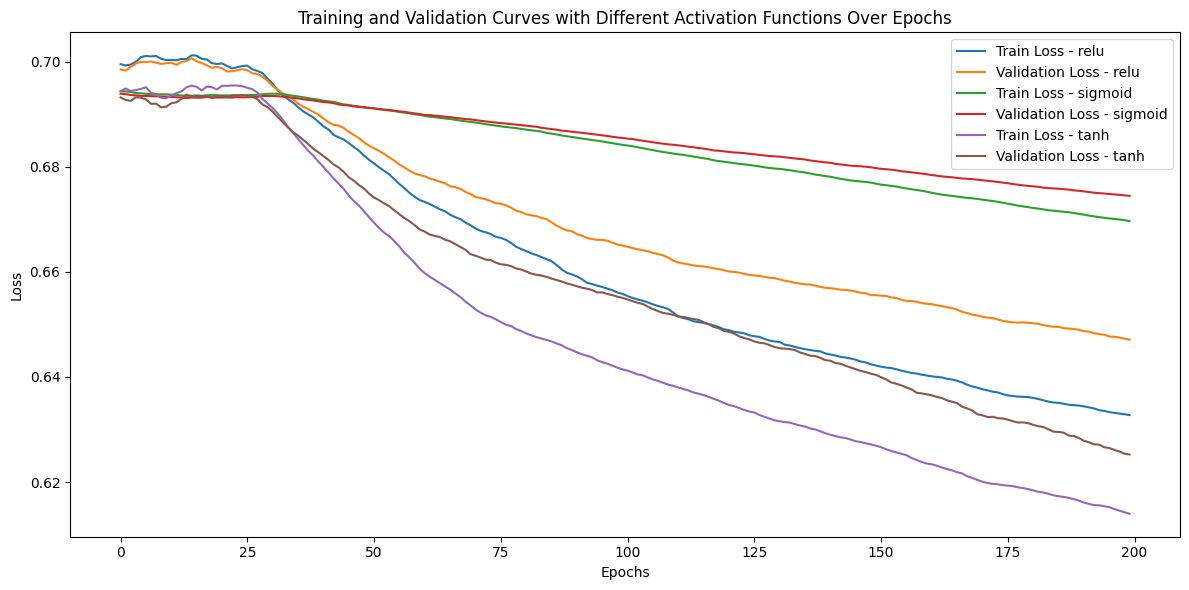

In [138]:
# Training and Validation Loss over epochs
plt.figure(figsize=(12, 6))
for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
plt.title('Training and Validation Curves with Different Activation Functions Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### tanh performs the best in terms of reducing both the training and validation losses. 
it achieves the lowest overall losss values, which suggests that it can generalize well

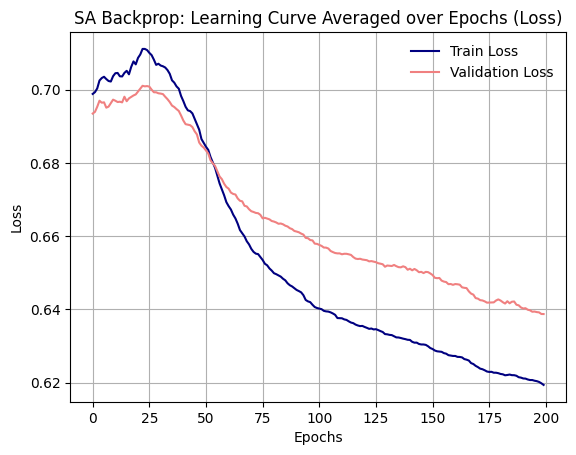

In [143]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SA Backprop: Learning Curve Averaged over Epochs (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

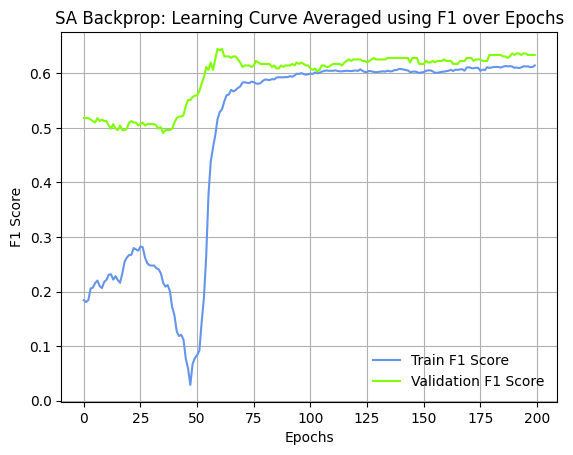

In [144]:
# plot the iterative learning curve (F1_score)
plt.plot(net.history[:, 'train_acc'], label='Train F1 Score', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation F1 Score', color='chartreuse')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("SA Backprop: Learning Curve Averaged using F1 over Epochs")
plt.grid(visible=True)
plt.legend(frameon=False)

#### oops forgot to fit it afterwards

In [145]:
net.fit(X_train_scaled, y_train)
y_proba_train = net.predict_proba(X_train_scaled)

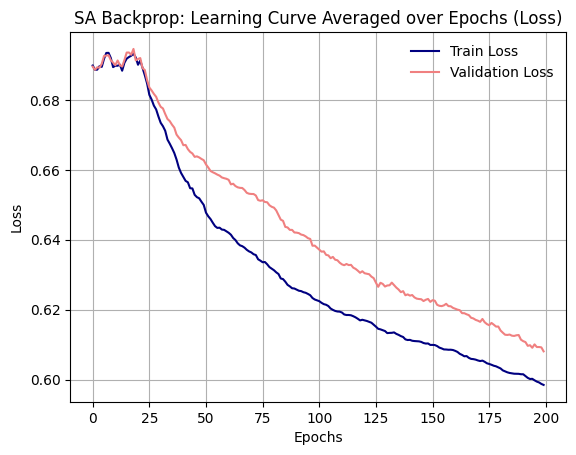

In [146]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SA Backprop: Learning Curve Averaged over Epochs (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

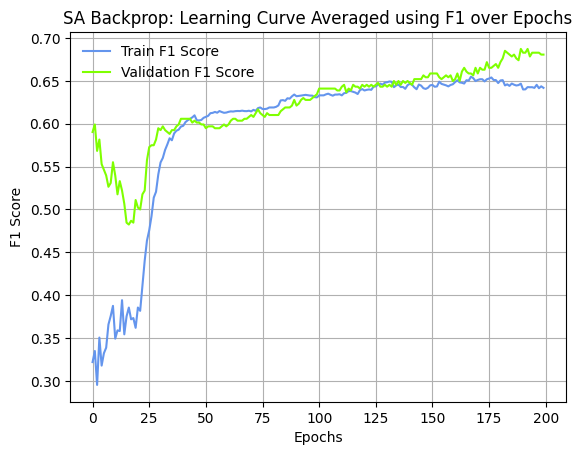

In [147]:
# plot the iterative learning curve (F1_score)
plt.plot(net.history[:, 'train_acc'], label='Train F1 Score', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation F1 Score', color='chartreuse')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("SA Backprop: Learning Curve Averaged using F1 over Epochs")
plt.grid(visible=True)
plt.legend(frameon=False)

#### ensure results with a design matrix

In [150]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=X_train_fold.shape[1],
        module__output_dim=2,
        module__hidden_units=30,
        module__hidden_layers=1,
        module__activation_function=activation_fn,
        max_epochs=200,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

# Parameters
activation_functions_list = ['relu', 'sigmoid', 'tanh']
cv_folds_list = [3, 5, 7, 10]

results = []

for activation in tqdm(activation_functions_list, desc="Activations"):
    for cv_folds in tqdm(cv_folds_list, desc=f'Activation: {activation}, Fold: {cv_folds}', leave=False):
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        val_f1_scores = []
        runtimes = []
        
        for train_index, val_index in skf.split(X_train_scaled, y_train):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            net = create_model(X_train_fold.shape[1], 2, 30, 1, activation_functions[activation])
            
            start_time = time.time()
            net.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            runtime = end_time - start_time
            runtimes.append(runtime)

            y_pred = net.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_pred)
            val_f1_scores.append(val_f1)

        mean_f1_score = np.mean(val_f1_scores)
        mean_runtime = np.mean(runtimes)
        results.append({'activation': activation, 'cv_folds': cv_folds, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})

results_df = pd.DataFrame(results)
print(results_df)

Activations: 100%|████████████████████████████| 3/3 [1:36:42<00:00, 1934.27s/it]

   activation  cv_folds  mean_f1_score  mean_runtime (s)
0        relu         3       0.607931         34.564140
1        relu         5       0.630945         48.894489
2        relu         7       0.634894         49.339332
3        relu        10       0.641444         47.316864
4     sigmoid         3       0.621496         35.447170
5     sigmoid         5       0.647821         43.974824
6     sigmoid         7       0.633830         45.714470
7     sigmoid        10       0.642886         43.374661
8        tanh         3       0.608523         26.651440
9        tanh         5       0.620838         37.832647
10       tanh         7       0.651538         65.425115
11       tanh        10       0.637605        282.623312


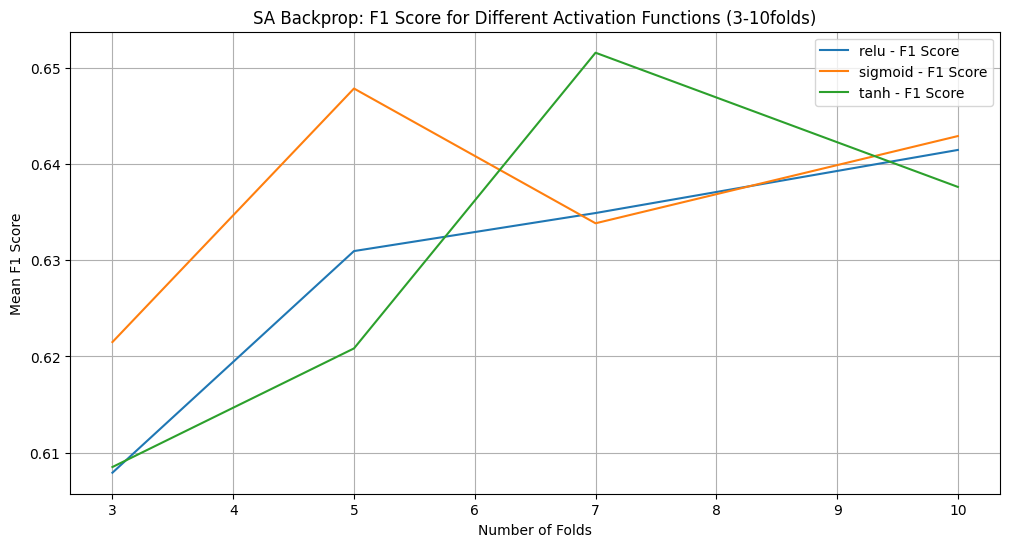

Best Activation Function: tanh with F1 Score: 0.6515384275794239


In [152]:
# Plot results
plt.figure(figsize=(12, 6))
for activation in activation_functions_list:
    subset = results_df[results_df['activation'] == activation]
    plt.plot(subset['cv_folds'], subset['mean_f1_score'], label=f'{activation} - F1 Score')
plt.xlabel('Number of Folds')
plt.ylabel('Mean F1 Score')
plt.title('SA Backprop: F1 Score for Different Activation Functions (3-10folds)')
plt.legend()
plt.grid()
plt.show()

# Print the best activation function
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Activation Function: {best_result['activation']} with F1 Score: {best_result['mean_f1_score']}")


#### the design matrix confirmed that tanh activation function performs the best

#### do a rudimentary test on optimal layer weights for SA

Architecture: 100%|██████████████████████████████| 4/4 [08:17<00:00, 124.43s/it]


     architecture  mean_f1_score  mean_runtime (s)
0        [64, 32]       0.641126         26.604984
1       [128, 64]       0.628744         24.208344
2  [256, 128, 64]       0.628737         24.793031
3    [32, 32, 32]       0.627885         23.848498


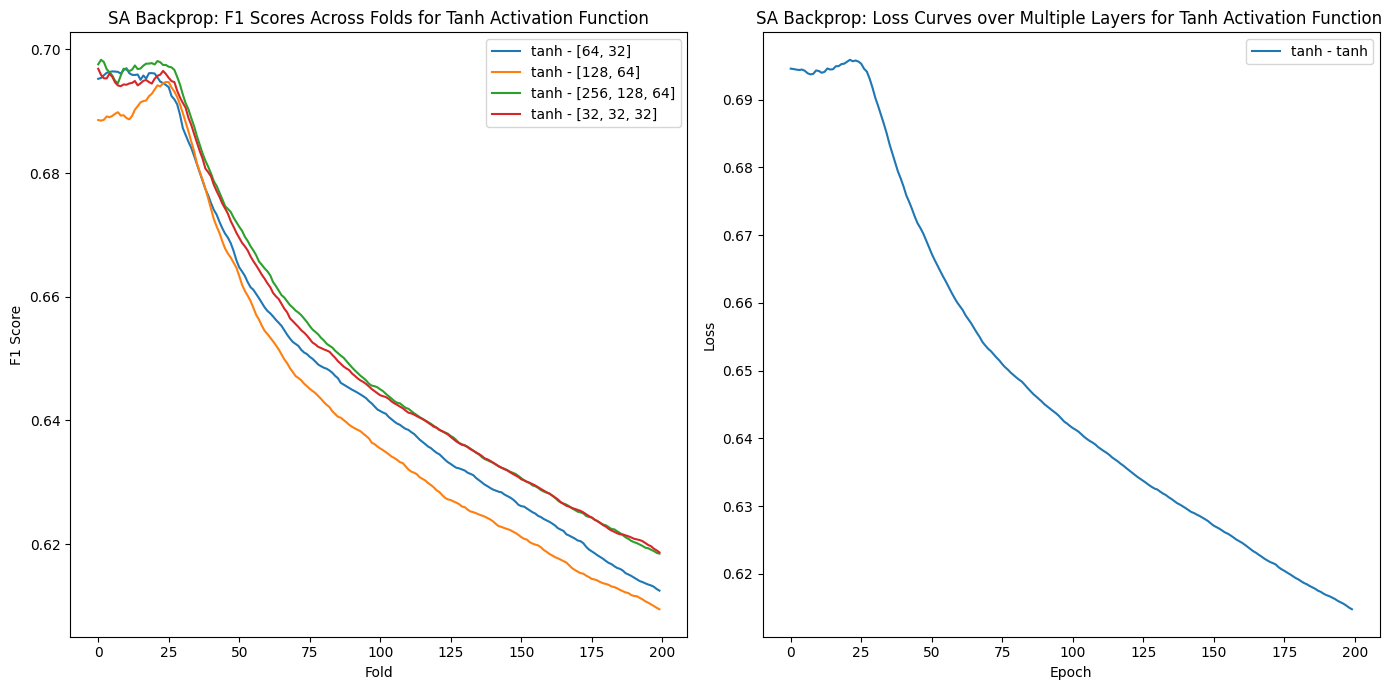

Best Architecture: [64, 32] with F1 Score: 0.6411255254663599


In [153]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=X_train_fold.shape[1],
        module__output_dim=2,
        module__hidden_units=30,
        module__hidden_layers=1,
        module__activation_function=activation_fn,
        max_epochs=200,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.history[:, 'train_loss'])
    
    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [64, 32],
    [128, 64],
    [256, 128, 64],
    [32, 32, 32]
]
cv_folds = 5  # Use 5-fold cross-validation

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, nn.Tanh, cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"tanh - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('SA Backprop: F1 Scores Across Folds for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each architecture
plt.subplot(1, 2, 2)
for architecture, loss_histories in all_loss_histories.items():
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'tanh - {architecture}')

plt.title('SA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")

#### do a finer grain grid search on optimal layer sizes and weights

In [154]:
def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.history[:, 'train_loss'])
    
    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [32, 32],
    [32, 64],
    [16, 16, 16],
    [128, 128],
    [16, 32],
    [16, 16],
    [64, 64],
    [64, 128],
    [16, 32, 64],
    [16, 32, 32],
    [32, 32, 32],
]
cv_folds = 5  # Use 5-fold cross-validation

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, nn.Tanh, cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

Architecture: 100%|████████████████████████████| 11/11 [22:19<00:00, 121.75s/it]

    architecture  mean_f1_score  mean_runtime (s)
0       [32, 32]       0.638481         24.150781
1       [32, 64]       0.644826         25.563083
2   [16, 16, 16]       0.637042         24.598320
3     [128, 128]       0.631255         23.814077
4       [16, 32]       0.634630         24.586724
5       [16, 16]       0.636106         24.217908
6       [64, 64]       0.637322         24.510965
7      [64, 128]       0.643490         24.072337
8   [16, 32, 64]       0.640935         23.886096
9   [16, 32, 32]       0.639384         24.096892
10  [32, 32, 32]       0.635592         24.032190


In [155]:
# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")

Best Architecture: [32, 64] with F1 Score: 0.6448261774785092


#### having discovered the best architecture [32, 64], tanh activation function, begin experimenting with temperature

#### have to modify custom class to allow for temp list

In [166]:
class SAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, t=10000.0, cooling=0.95, dropout=0, step_size=0.1, output_activation=nn.Softmax(dim=-1)):
        super(SAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.t = float(t)  # Ensure t is a float
        self.cooling = cooling
        self.dropout = nn.Dropout(p=dropout)
        self.step_size = step_size
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def run_sa_single_step(self, net, X_train, y_train):
        net.save_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
        y_pred = net.infer(X_train, **{})
        loss = net.get_loss(y_pred, y_train, X_train, training=False)

        layer = np.random.randint(0, len(self.layers)-1)
        input_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[0])
        output_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[1])
        neighbor = self.step_size * np.random.choice([-1, 1])

        with torch.no_grad():
            net.module_.layers[layer].weight[input_dim][output_dim] += neighbor

        new_y_pred = net.infer(X_train, **{})
        new_loss = net.get_loss(new_y_pred, y_train, X_train, training=False)
        delta = new_loss.item() - loss.item()

        if new_loss.item() > loss.item() and np.random.rand() >= math.exp(-delta / self.t):
            net.load_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
            new_y_pred = y_pred
            new_loss = loss

        self.t = self.cooling * self.t
        return new_loss, new_y_pred

    @staticmethod
    def register_sa_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch, **fit_params):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_sa_single_step(self, Xi, yi, **fit_params)
            return {
                'loss': loss,  # Ensure this is a tensor
                'y_pred': y_pred,
            }

Temperature Values: 100%|████████████████████████| 7/7 [19:29<00:00, 167.10s/it]


   temperature  mean_f1_score  mean_runtime  \
0          100       0.637461     32.528871   
1          500       0.644275     30.794731   
2         1000       0.649386     30.839082   
3         5000       0.649975     34.177125   
4        10000       0.650774     38.279800   
5        25000       0.654671     35.181382   
6        50000       0.645872     32.000671   

                                        loss_history  
0  [0.6959862672281956, 0.6962977694812256, 0.696...  
1  [0.6941761606498325, 0.6938154494031228, 0.693...  
2  [0.7055568085001, 0.7058394297483958, 0.706016...  
3  [0.7027547471935031, 0.7018507467845809, 0.701...  
4  [0.6978996271435396, 0.6986832159344649, 0.699...  
5  [0.6924668362435229, 0.6926716836719431, 0.691...  
6  [0.7004536529163571, 0.7000049792679802, 0.700...  


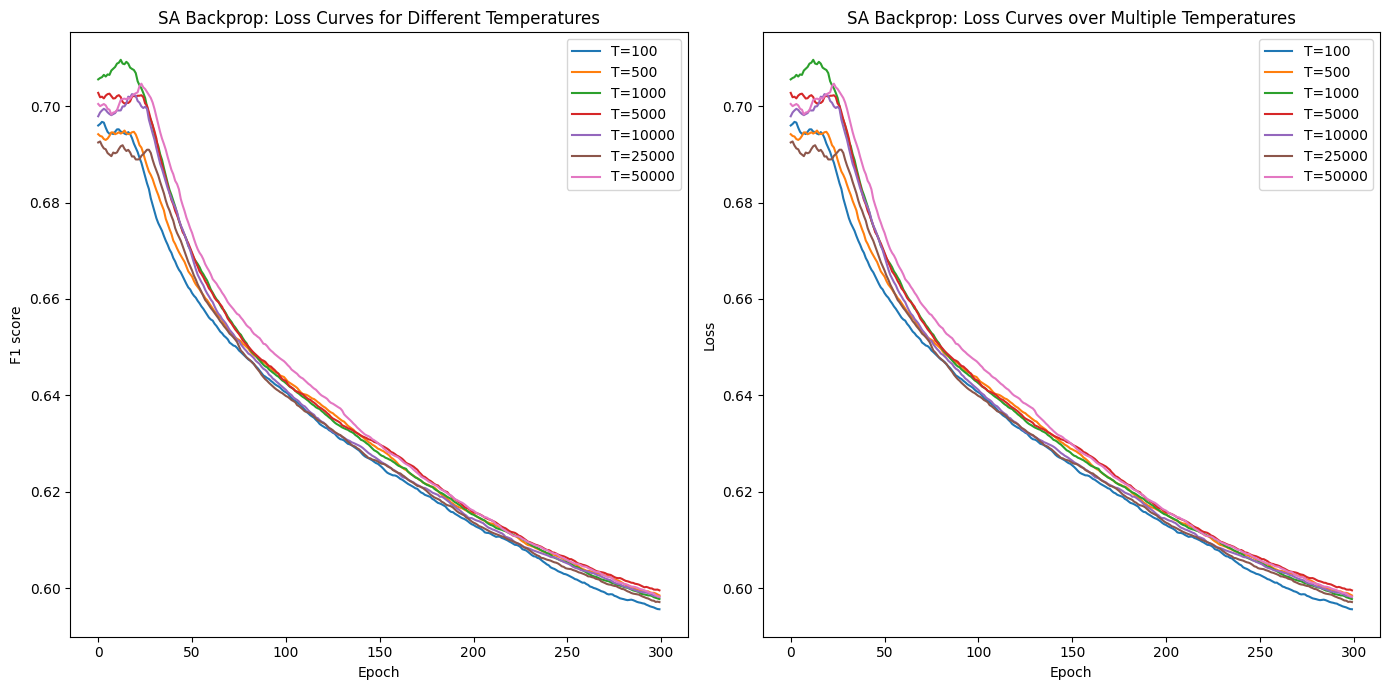

Best Temperature: 25000 with F1 Score: 0.6546707686228469


In [168]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, t=10000.0):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        module__t=t,
        max_epochs=300,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, temp_values, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    results = []

    for t in tqdm(temp_values, desc="Temperature Values"):
        val_f1_scores = []
        runtimes = []
        loss_histories = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X[train_index], X[val_index]
            y_train_fold, y_val_fold = y[train_index], y[val_index]

            net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation, t=t)

            start_time = time.time()
            net.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            runtime = end_time - start_time
            runtimes.append(runtime)

            y_pred = net.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_pred)
            val_f1_scores.append(val_f1)

            loss_histories.append(net.history[:, 'train_loss'])

        max_len = max(len(history) for history in loss_histories)
        padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]

        mean_loss_history = np.mean(padded_loss_histories, axis=0)
        results.append({
            'temperature': t,
            'mean_f1_score': np.mean(val_f1_scores),
            'mean_runtime': np.mean(runtimes),
            'loss_history': mean_loss_history
        })
    
    return results

# Define the fixed architecture and temperature values to test
layers = [32, 64]
temp_values = [100, 500, 1000, 5000, 10000, 25000, 50000]
cv_folds = 5  # Use 5-fold cross-validation

# Perform cross-validation
results = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, layers, nn.Tanh, temp_values, cv_folds)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across temperature values
plt.subplot(1, 2, 1)
for result in results:
    label = f"T={result['temperature']}"
    plt.plot(result['loss_history'], label=label)
plt.title('SA Backprop: Loss Curves for Different Temperatures')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend()

# Plot overall loss curves for each temperature
plt.subplot(1, 2, 2)
for result in results:
    plt.plot(result['loss_history'], label=f"T={result['temperature']}")

plt.title('SA Backprop: Loss Curves over Multiple Temperatures')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best temperature
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Temperature: {best_result['temperature']} with F1 Score: {best_result['mean_f1_score']}")


#### now that temperature (25000) has been determined, look at cooling

In [170]:
import random

In [172]:
# Set seed for reproducibility
seed = 428
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

#### adjust custom class because got a ZeroDivisionError -> maybe t gets too small, so set a lower bound on it

In [173]:
import torch
import torch.nn as nn
import numpy as np
import math

class SAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, t=10000.0, cooling=0.95, dropout=0, step_size=0.1, output_activation=nn.Softmax(dim=-1)):
        super(SAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.t = float(t)  # Ensure t is a float
        self.cooling = cooling
        self.dropout = nn.Dropout(p=dropout)
        self.step_size = step_size
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def run_sa_single_step(self, net, X_train, y_train):
        net.save_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
        y_pred = net.infer(X_train, **{})
        loss = net.get_loss(y_pred, y_train, X_train, training=False)

        layer = np.random.randint(0, len(self.layers)-1)
        input_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[0])
        output_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[1])
        neighbor = self.step_size * np.random.choice([-1, 1])

        with torch.no_grad():
            net.module_.layers[layer].weight[input_dim][output_dim] += neighbor

        new_y_pred = net.infer(X_train, **{})
        new_loss = net.get_loss(new_y_pred, y_train, X_train, training=False)
        delta = new_loss.item() - loss.item()

        if new_loss.item() > loss.item() and np.random.rand() >= math.exp(-delta / self.t):
            net.load_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
            new_y_pred = y_pred
            new_loss = loss

        # Prevent t from reaching zero
        self.t = max(self.cooling * self.t, 1e-8)
        return new_loss, new_y_pred

    @staticmethod
    def register_sa_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch, **fit_params):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_sa_single_step(self, Xi, yi, **fit_params)
            return {
                'loss': loss,  # Ensure this is a tensor
                'y_pred': y_pred,
            }


Cooling Values: 100%|████████████████████████████| 6/6 [24:56<00:00, 249.42s/it]


   cooling  mean_f1_score  mean_runtime  \
0     0.50       0.640752     50.661711   
1     0.75       0.649048     49.968021   
2     0.85       0.651591     50.323420   
3     0.90       0.648585     50.342263   
4     0.95       0.649055     53.585513   
5     0.99       0.637350     44.180439   

                                        loss_history  
0  [0.6917567058351688, 0.6911683372309086, 0.689...  
1  [0.6950281229141096, 0.695263362260879, 0.6959...  
2  [0.7010278540940142, 0.7011850995198835, 0.701...  
3  [0.7039832429664779, 0.7042154431534702, 0.705...  
4  [0.6950734743958867, 0.694882774497487, 0.6950...  
5  [0.7014157180166389, 0.7010075583923463, 0.700...  


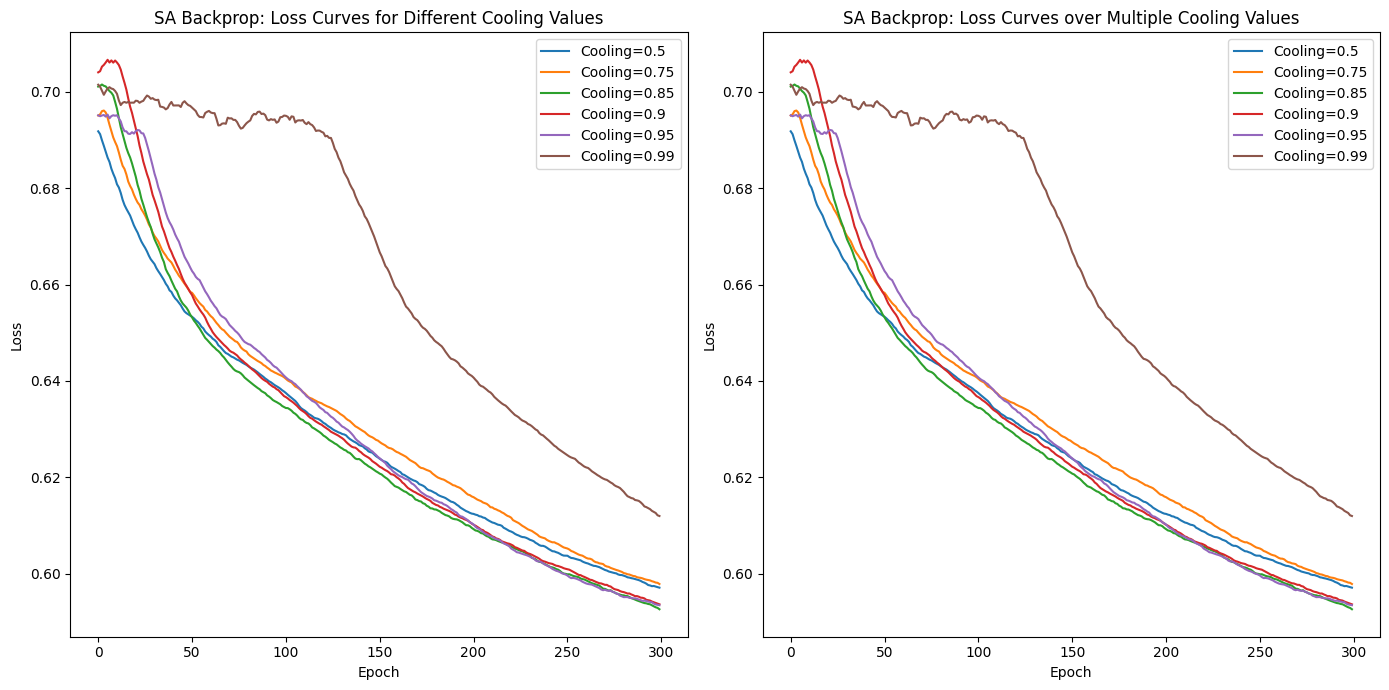

Best Cooling Value: 0.85 with F1 Score: 0.6515908222124677


In [174]:
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, t=2500.0, cooling=0.95):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        module__t=t,
        module__cooling=cooling,
        max_epochs=300,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, cooling_values, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    results = []

    for cooling in tqdm(cooling_values, desc="Cooling Values"):
        val_f1_scores = []
        runtimes = []
        loss_histories = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X[train_index], X[val_index]
            y_train_fold, y_val_fold = y[train_index], y[val_index]

            net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation, cooling=cooling)

            start_time = time.time()
            net.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            runtime = end_time - start_time
            runtimes.append(runtime)

            y_pred = net.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_pred)
            val_f1_scores.append(val_f1)

            loss_histories.append(net.history[:, 'train_loss'])

        max_len = max(len(history) for history in loss_histories)
        padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]

        mean_loss_history = np.mean(padded_loss_histories, axis=0)
        results.append({
            'cooling': cooling,
            'mean_f1_score': np.mean(val_f1_scores),
            'mean_runtime': np.mean(runtimes),
            'loss_history': mean_loss_history
        })
    
    return results

# Define the fixed architecture and cooling values to test
layers = [32, 64]
cooling_values = [0.5, 0.75, 0.85, 0.90, 0.95, 0.99]
cv_folds = 5  # Use 5-fold cross-validation

# Perform cross-validation
results = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, layers, nn.Tanh, cooling_values, cv_folds)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across cooling values
plt.subplot(1, 2, 1)
for result in results:
    label = f"Cooling={result['cooling']}"
    plt.plot(result['loss_history'], label=label)
plt.title('SA Backprop: Loss Curves for Different Cooling Values')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot overall loss curves for each cooling value
plt.subplot(1, 2, 2)
for result in results:
    plt.plot(result['loss_history'], label=f"Cooling={result['cooling']}")

plt.title('SA Backprop: Loss Curves over Multiple Cooling Values')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best cooling value
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Cooling Value: {best_result['cooling']} with F1 Score: {best_result['mean_f1_score']}")


#### note: seems like it needs more data to converge

#### plot the learning/validation curve

In [175]:
# Define the model with the specified hyperparameters
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, t=25000.0, cooling=0.85):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        module__t=t,
        module__cooling=cooling,
        max_epochs=300,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

# Function to get learning curve data
def learning_curve_data(X, y, model_fn, layers, activation, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    train_sizes = []
    train_scores = []
    val_scores = []
    train_losses = []
    val_losses = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)
        
        net.fit(X_train_fold, y_train_fold)
        
        train_size = len(train_index)
        train_sizes.append(train_size)

        y_train_pred = net.predict(X_train_fold)
        y_val_pred = net.predict(X_val_fold)
        
        train_f1 = f1_score(y_train_fold, y_train_pred)
        val_f1 = f1_score(y_val_fold, y_val_pred)
        
        train_scores.append(train_f1)
        val_scores.append(val_f1)
        
        # Record the last training and validation loss
        train_losses.append(net.history[-1, 'train_loss'])
        val_losses.append(net.history[-1, 'valid_loss'])

    return train_sizes, train_scores, val_scores, train_losses, val_losses

# Get learning curve data
layers = [32, 64]
activation_function = nn.Tanh
train_sizes, train_scores, val_scores, train_losses, val_losses = learning_curve_data(X_train_scaled, y_train.values, create_model, layers, activation_function)

# Convert lists to arrays for easier plotting
train_sizes = np.array(train_sizes)
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

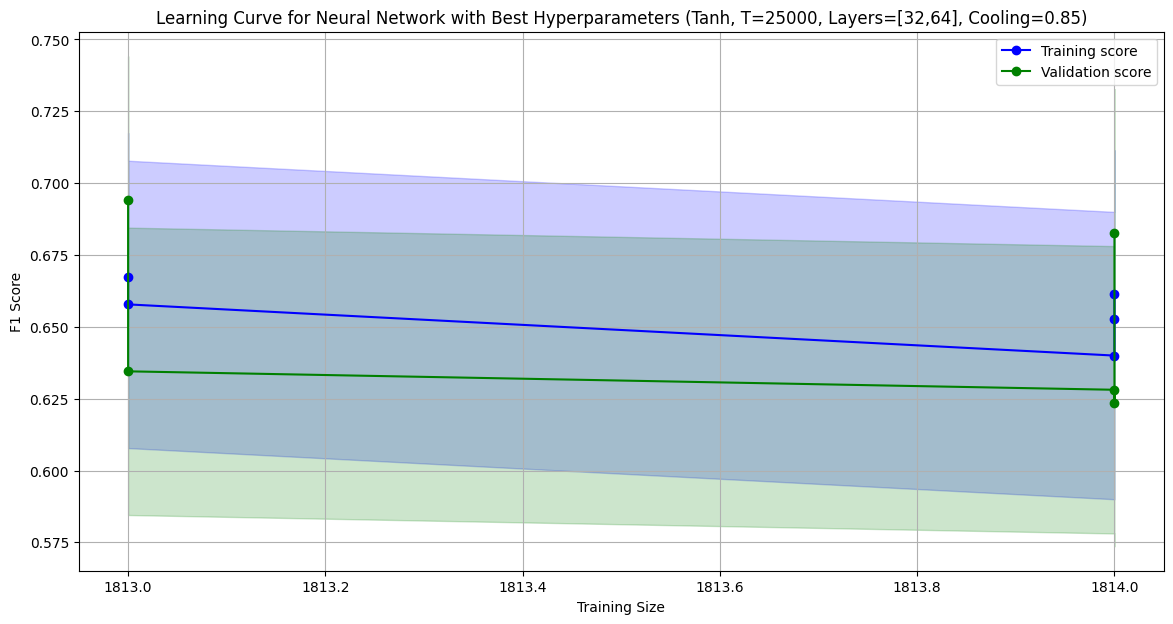

In [178]:
# Plot F1 Scores learning curve 
plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_scores, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_scores, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_scores - 0.05, train_scores + 0.05, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_scores - 0.05, val_scores + 0.05, alpha=0.2, color='green')
plt.title('Learning Curve for Neural Network with Best Hyperparameters (Tanh, T=25000, Layers=[32,64], Cooling=0.85)')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()

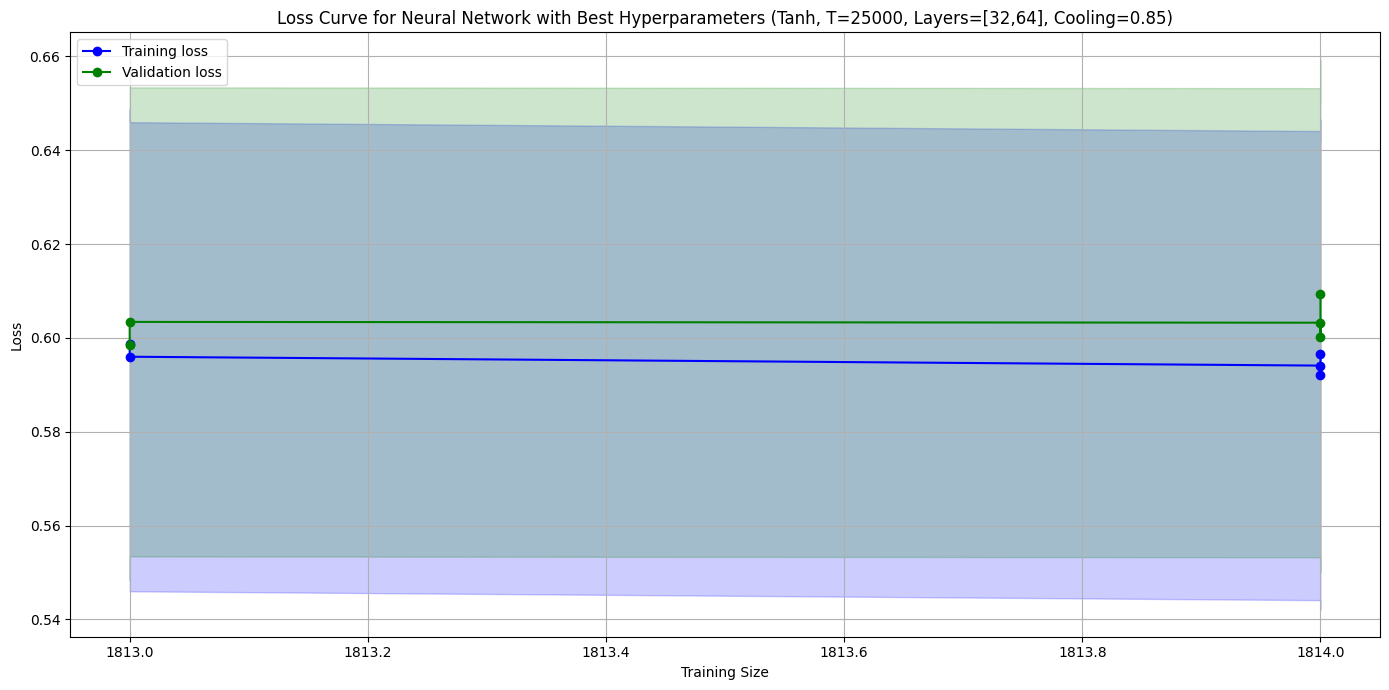

In [179]:
# Plot Loss
plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_losses, 'o-', color='blue', label='Training loss')
plt.plot(train_sizes, val_losses, 'o-', color='green', label='Validation loss')
plt.fill_between(train_sizes, train_losses - 0.05, train_losses + 0.05, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_losses - 0.05, val_losses + 0.05, alpha=0.2, color='green')
plt.title('Loss Curve for Neural Network with Best Hyperparameters (Tanh, T=25000, Layers=[32,64], Cooling=0.85)')
plt.xlabel('Training Size')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()


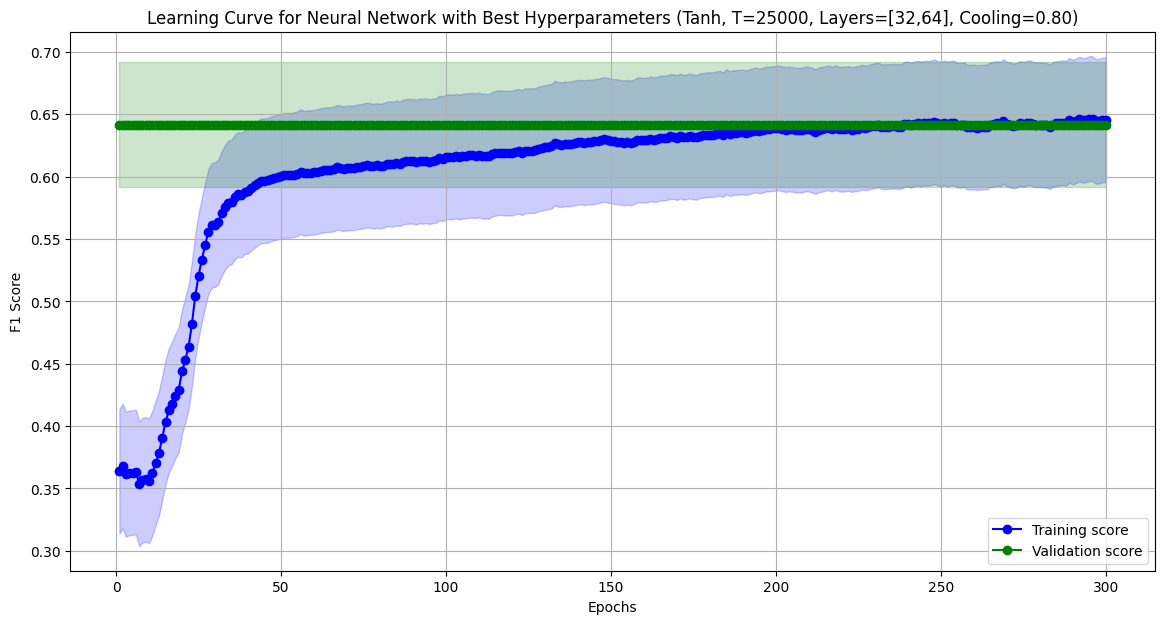

In [180]:
# Define the model with the specified hyperparameters
def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.Tanh, t=25000.0, cooling=0.85):
    return NeuralNetClassifier(
        module=SAModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        module__t=t,
        module__cooling=cooling,
        max_epochs=300,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        iterator_train__shuffle=True,
    )

# Function to get learning curve data
def learning_curve_data(X, y, model_fn, layers, activation, n_splits=5, max_epochs=300):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    epoch_range = range(1, max_epochs + 1)
    train_f1_scores = []
    val_f1_scores = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers) - 1, activation)
        
        net.fit(X_train_fold, y_train_fold)
        
        train_f1_per_epoch = [epoch['train_f1'] for epoch in net.history]
        val_f1_per_epoch = [f1_score(y_val_fold, net.predict(X_val_fold)) for epoch in net.history]

        train_f1_scores.append(train_f1_per_epoch)
        val_f1_scores.append(val_f1_per_epoch)

    mean_train_f1_scores = np.mean(train_f1_scores, axis=0)
    mean_val_f1_scores = np.mean(val_f1_scores, axis=0)
    
    return epoch_range, mean_train_f1_scores, mean_val_f1_scores

# Get learning curve data
layers = [32, 64]
activation_function = nn.Tanh
epoch_range, mean_train_f1_scores, mean_val_f1_scores = learning_curve_data(X_train_scaled, y_train.values, create_model, layers, activation_function)

# Plot F1 Scores learning curve over epochs
plt.figure(figsize=(14, 7))
plt.plot(epoch_range, mean_train_f1_scores, 'o-', color='blue', label='Training score')
plt.plot(epoch_range, mean_val_f1_scores, 'o-', color='green', label='Validation score')
plt.fill_between(epoch_range, mean_train_f1_scores - 0.05, mean_train_f1_scores + 0.05, alpha=0.2, color='blue')
plt.fill_between(epoch_range, mean_val_f1_scores - 0.05, mean_val_f1_scores + 0.05, alpha=0.2, color='green')
plt.title('Learning Curve for Neural Network with Best Hyperparameters (Tanh, T=25000, Layers=[32,64], Cooling=0.80)')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [182]:
from scipy.ndimage import gaussian_filter1d

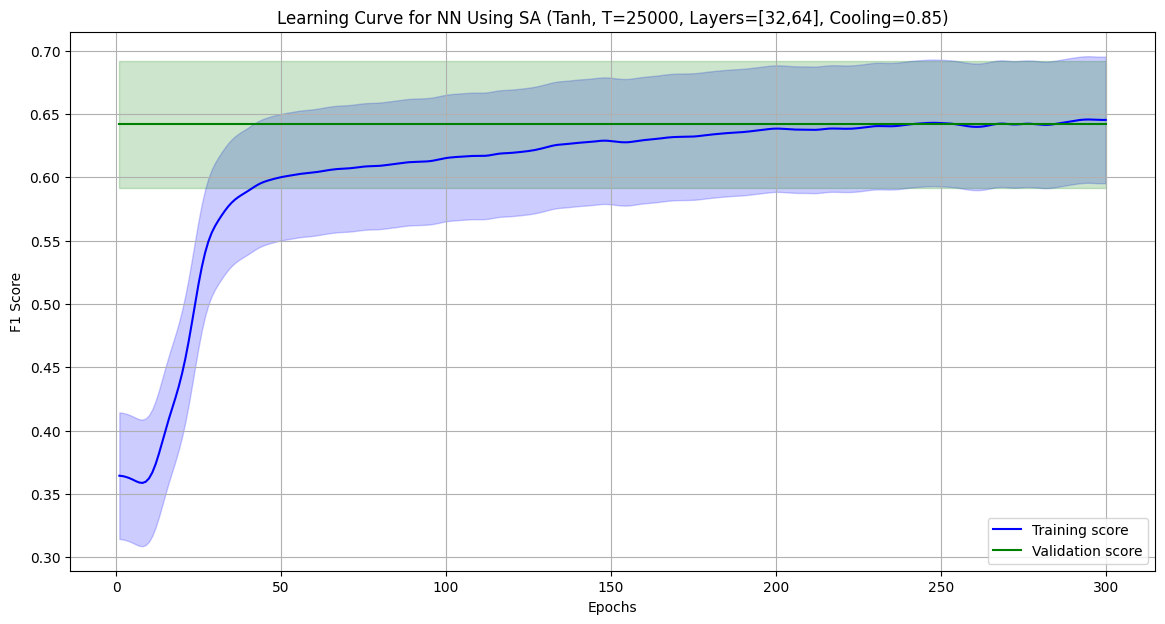

In [183]:
# Apply Gaussian smoothing
smoothed_train_f1_scores = gaussian_filter1d(mean_train_f1_scores, sigma=2)
smoothed_val_f1_scores = gaussian_filter1d(mean_val_f1_scores, sigma=2)

# Plot F1 Scores learning curve over epochs
plt.figure(figsize=(14, 7))
plt.plot(epoch_range, smoothed_train_f1_scores, '-', color='blue', label='Training score')
plt.plot(epoch_range, smoothed_val_f1_scores, '-', color='green', label='Validation score')
plt.fill_between(epoch_range, smoothed_train_f1_scores - 0.05, smoothed_train_f1_scores + 0.05, alpha=0.2, color='blue')
plt.fill_between(epoch_range, smoothed_val_f1_scores - 0.05, smoothed_val_f1_scores + 0.05, alpha=0.2, color='green')
plt.title('Learning Curve for NN Using SA (Tanh, T=25000, Layers=[32,64], Cooling=0.85)')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## Genetic Algorithms (GA) - for time purposes, 3 folds instead of 5

In [184]:
from pyperch.neural.ga_nn import GAModule

In [185]:
GAModule.register_ga_training_step()

In [233]:
# Set seed for reproducibility
seed = 428
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

#### custom class for GAModule for activation function

In [195]:
def add_to(func):
    @functools.wraps(func)
    def decorator(*args, **kwargs):
        setattr(func, args[0].__name__, args[0])
        return func
    return decorator

In [213]:
def unpack_data(batch):
    if isinstance(batch, (list, tuple)) and len(batch) == 2:
        return to_device(batch[0], batch[1])
    else:
        raise ValueError("Expected batch to be a list or tuple of length 2")

In [214]:
class GAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, 
                 activation_function=nn.ReLU, population_size=100, generations=100,
                 to_mutate=0.1, to_crossover=0.5, elitism=True, tournament_size=3, 
                 dropout=0, output_activation=nn.Softmax(dim=-1)):
        super(GAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.population_size = population_size
        self.generations = generations
        self.to_mutate = to_mutate
        self.to_crossover = to_crossover
        self.elitism = elitism
        self.tournament_size = tournament_size
        self.dropout = nn.Dropout(p=dropout)
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def run_ga_single_step(self, net, X_train, y_train):
        current_population = [net.module_.state_dict() for _ in range(self.population_size)]
        
        fitness_scores = []
        for state_dict in current_population:
            net.module_.load_state_dict(state_dict)
            y_pred = net.infer(X_train, **{})
            loss = net.get_loss(y_pred, y_train, X_train, training=False)
            fitness_scores.append(loss.item())  # Convert tensor to scalar
        
        selected_parents = []
        for _ in range(self.population_size):
            tournament = np.random.choice(current_population, self.tournament_size, replace=False)
            best_parent = min(tournament, key=lambda sd: fitness_scores[current_population.index(sd)])
            selected_parents.append(best_parent)
        
        offspring_population = []
        for i in range(0, self.population_size, 2):
            parent1, parent2 = selected_parents[i], selected_parents[i+1]
            child1, child2 = parent1.copy(), parent2.copy()
            
            if np.random.rand() < self.to_crossover:
                for layer in range(len(self.layers)):
                    if np.random.rand() < 0.5:
                        child1[f'layers.{layer}.weight'], child2[f'layers.{layer}.weight'] = (
                            child2[f'layers.{layer}.weight'], child1[f'layers.{layer}.weight']
                        )
            
            if np.random.rand() < self.to_mutate:
                for layer in range(len(self.layers)):
                    if np.random.rand() < 0.1:
                        child1[f'layers.{layer}.weight'] += 0.01 * torch.randn_like(child1[f'layers.{layer}.weight'])
                        child2[f'layers.{layer}.weight'] += 0.01 * torch.randn_like(child2[f'layers.{layer}.weight'])
            
            offspring_population.extend([child1, child2])
        
        new_population = selected_parents if self.elitism else []
        new_population.extend(offspring_population)
        
        best_individual = min(new_population, key=lambda sd: fitness_scores[current_population.index(sd)])
        net.module_.load_state_dict(best_individual)
        
        return net.get_loss(net.infer(X_train, **{}), y_train, X_train, training=False), net.infer(X_train, **{})

    @staticmethod
    def register_ga_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch, **fit_params):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_ga_single_step(self, Xi, yi, **fit_params)
            return {
                'loss': loss,
                'y_pred': y_pred,
            }

GAModuleMODIFIED.register_ga_training_step()

In [215]:
# Define the neural network with skorch and GAModuleMODIFIED
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=GAModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__population_size=100,
            module__generations=100,
            module__to_mutate=0.1,  # Mutation rate, adjust as necessary
            module__to_crossover=0.5,  # Crossover rate, adjust as necessary
            module__elitism=True,
            module__tournament_size=3,
            max_epochs=200,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(net.history[:, 'train_loss'])
        valid_losses_per_epoch.append(net.history[:, 'valid_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(train_losses_per_epoch, axis=0)
    avg_valid_losses = np.mean(valid_losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_train_losses, avg_valid_losses, avg_runtimes)


Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import math

class SAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, t=10000, cooling=0.95, dropout=0, step_size=0.1, output_activation=nn.Softmax(dim=-1)):
        super(SAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.t = t
        self.cooling = cooling
        self.dropout = nn.Dropout(p=dropout)
        self.step_size = step_size
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def run_sa_single_step(self, net, X_train, y_train):
        net.save_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
        y_pred = net.infer(X_train, **{})
        loss = net.get_loss(y_pred, y_train, X_train, training=False)

        layer = np.random.randint(0, len(self.layers)-1)
        input_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[0])
        output_dim = np.random.randint(0, net.module_.layers[layer].weight.shape[1])
        neighbor = self.step_size * np.random.choice([-1, 1])

        with torch.no_grad():
            net.module_.layers[layer].weight[input_dim][output_dim] += neighbor

        new_y_pred = net.infer(X_train, **{})
        new_loss = net.get_loss(new_y_pred, y_train, X_train, training=False)
        delta = new_loss - loss

        if new_loss > loss and np.random.rand() >= math.exp(-delta / self.t):
            net.load_params(f_params='sa_model_params.pt', f_optimizer='sa_optimizer_params.pt')
            new_y_pred = y_pred
            new_loss = loss

        self.t = self.cooling * self.t
        return new_loss, new_y_pred

    @staticmethod
    def register_sa_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch, **fit_params):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_sa_single_step(self, Xi, yi, **fit_params)
            return {
                'loss': loss,
                'y_pred': y_pred,
            }


In [228]:
import numpy as np
import torch
from torch import nn
from skorch import NeuralNet
from pyperch.utils.decorators import add_to
from skorch.dataset import unpack_data
from copy import deepcopy

class GAModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, population_size=300, step_size=.1, dropout=0, to_mate=150, to_mutate=50, output_activation=nn.Softmax(dim=-1)):
        super(GAModuleMODIFIED, self).__init__()
        
        self.layers = nn.ModuleList()
        self.population_size = population_size
        self.to_mate = to_mate
        self.to_mutate = to_mutate 
        self.dropout = nn.Dropout(p=dropout)
        self.step_size = step_size
        self.activation = activation_function()
        self.hidden_layers = hidden_layers
        self.output_activation = output_activation
        self.population = None

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))
        
    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(self.hidden_layers):
            X = self.activation(self.layers[i+1](X))
        X = self.output_activation(self.layers[self.hidden_layers+1](X))
        return X

    def generate_initial_population(self, size, model):
        initial_population = []
        with torch.no_grad():
            for _ in range(size):
                new_model = deepcopy(model)
                for new_param, param in zip(new_model.parameters(), model.parameters()):
                    if len(param.shape) > 1:  # using weight matrices
                        new_param.data = param.data + torch.randn_like(param) * 0.1
                initial_population.append(new_model)
        return initial_population

    def evaluate(self, individual, criterion, data, targets):
        individual.eval()
        with torch.no_grad():
            outputs = individual(data)
            loss = criterion(outputs, targets)
        return -loss.item()

    def mate(self, parent1, parent2):
        child = deepcopy(parent1)
        for child_param, parent1_param, parent2_param in zip(child.parameters(), parent1.parameters(), parent2.parameters()):
            if len(child_param.shape) > 1:  # mate weights
                mask = torch.bernoulli(torch.full_like(parent1_param.data, 0.5))
                child_param.data = mask * parent1_param.data + (1 - mask) * parent2_param.data
        return child

    def mutate(self, individual):
        mutation_strength = 0.1
        for param in individual.parameters():
            if len(param.shape) > 1:  # mutate weights
                if np.random.rand() < mutation_strength:
                    noise = torch.randn_like(param) * 0.1
                    param.data += noise


    def run_ga_single_step(self, net, X_train, y_train):
        # calc old loss
        y_pred = net.infer(X_train)
        loss = net.get_loss(y_pred, y_train, X_train, training=False)

        model = net.module_
        data = X_train
        targets = y_train

        if self.population is None:
            self.population = self.generate_initial_population(self.population_size, model)

        values = np.array([self.evaluate(individual, net.criterion, data, targets) for individual in self.population])

        # Calculate probabilities for selection based on fitness
        fitness = np.array(values)
        probabilities = fitness - fitness.min()
        if probabilities.sum() > 0:
            probabilities /= probabilities.sum()
        else:
            probabilities = np.ones(self.population_size) / self.population_size

        new_population = []
        new_values = np.zeros(self.population_size)

        # Mate phase
        for i in range(self.to_mate):
            parents = np.random.choice(self.population_size, 2, p=probabilities)
            child = self.mate(self.population[parents[0]], self.population[parents[1]])
            new_population.append(child)
            new_values[i] = -1  # Mark for re-evaluation

        # Elite selection
        for i in range(self.to_mate, self.population_size):
            index = np.random.choice(self.population_size, p=probabilities)
            new_population.append(deepcopy(self.population[index]))
            new_values[i] = values[index]

        # Mutation phase
        for i in range(self.to_mutate):
            index = np.random.randint(self.population_size)
            self.mutate(new_population[index])
            new_values[index] = -1  # Mark for re-evaluation

        # Re-evaluate new population
        for i in range(self.population_size):
            if new_values[i] == -1:
                new_values[i] = self.evaluate(new_population[i], net.criterion, data, targets)

        self.population = new_population
        values = new_values
        best_fitness_index = np.argmin(values)

        old_model = net.module_
        net.module_ = deepcopy(self.population[best_fitness_index])

        # calc new loss
        new_y_pred = net.infer(X_train)
        new_loss = net.get_loss(new_y_pred, y_train, X_train, training=False)

        # Revert to old weights if new loss is higher
        if new_loss > loss:
            net.module_ = deepcopy(old_model)
            new_y_pred = y_pred
            new_loss = loss

        return new_loss, new_y_pred

    @staticmethod
    def register_ga_training_step():
        @add_to(NeuralNet)
        def train_step_single(self, batch):
            self._set_training(False)
            Xi, yi = unpack_data(batch)
            loss, y_pred = self.module_.run_ga_single_step(self, Xi, yi)
            return {
                'loss': loss,
                'y_pred': y_pred,
            }


In [229]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=GAModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=200,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(net.history[:, 'train_loss'])
        valid_losses_per_epoch.append(net.history[:, 'valid_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(train_losses_per_epoch, axis=0)
    avg_valid_losses = np.mean(valid_losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_train_losses, avg_valid_losses, avg_runtimes)


Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [ ]:
# Training and Validation Loss over epochs
plt.figure(figsize=(12, 6))
for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
plt.title('Training and Validation Curves with Different Activation Functions Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### use mlrose library instead of pyperch for GA

In [236]:
import mlrose_hiive
from mlrose_hiive.runners._nn_runner_base import _NNRunnerBase
from mlrose_hiive import GARunner

In [ ]:
# Define the neural network activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

# Assume X_train_scaled and y_train are already defined and preprocessed
# X_train_scaled = ...  # Your preprocessed feature matrix
# y_train = ...  # Your target vector

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=428)
results = []
histories = {}

for activation_fn in tqdm(activation_functions, desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_fn} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Define the neural network using mlrose_hiive
        nn_model = mlrose_hiive.NeuralNetwork(
            hidden_nodes=[36],
            activation=activation_fn,
            algorithm='genetic_alg',  # Specify the optimization algorithm
            max_iters=200,
            bias=True,
            is_classifier=True,
            learning_rate=0.1,
            early_stopping=True,
            clip_max=1e10,
            max_attempts=100,
            random_state=428,
            curve=True
        )
        
        start_time = time.time()
        nn_model.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = nn_model.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(nn_model.fitness_curve[:, 0])  # Assuming fitness_curve contains loss values

    # Pad the loss histories to have the same length
    max_len = max(len(history) for history in train_losses_per_epoch)
    padded_train_losses = [np.pad(history, (0, max_len - len(history)), 'edge') for history in train_losses_per_epoch]
    
    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(padded_train_losses, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_fn] = (avg_f1_scores, avg_train_losses, avg_runtimes)

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(histories, orient='index', columns=['avg_f1_scores', 'avg_train_losses', 'avg_runtimes'])
print(results_df)

Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [03:01, 181.06s/it]
relu CV Folds: 2it [06:06, 183.61s/it]
relu CV Folds: 3it [09:15, 186.01s/it]
Activation Functions:  33%|███████▎              | 1/3 [09:15<18:30, 555.34s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [02:11, 131.43s/it]

In [ ]:
# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# F1 Score vs. Training Samples
for activation_fn in activation_functions:
    f1_scores, train_losses, valid_losses, runtimes = histories[activation_fn]
    axs[0].plot(range(len(f1_scores)), f1_scores, label=f'{activation_fn}')
axs[0].set_title('F1 Score vs. Training Samples')
axs[0].set_xlabel('Training Samples')
axs[0].set_ylabel('F1 Score')
axs[0].legend()

# Loss Curve
for activation_fn in activation_functions:
    f1_scores, train_losses, valid_losses, runtimes = histories[activation_fn]
    axs[1].plot(range(len(train_losses)), train_losses, label=f'{activation_fn} - Training Loss')
    axs[1].plot(range(len(valid_losses)), valid_losses, label=f'{activation_fn} - Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Learning/Validation Curve
for activation_fn in activation_functions:
    f1_scores, train_losses, valid_losses, runtimes = histories[activation_fn]
    axs[2].plot(range(len(train_losses)), train_losses, label=f'{activation_fn} - Training Loss')
    axs[2].plot(range(len(valid_losses)), valid_losses, label=f'{activation_fn} - Validation Loss')
axs[2].set_title('Learning/Validation Curve')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
for activation in activation_functions_list:
    subset = results_df[results_df['activation'] == activation]
    plt.plot(subset['cv_folds'], subset['mean_f1_score'], label=f'{activation} - F1 Score')
plt.xlabel('Number of Folds')
plt.ylabel('Mean F1 Score')
plt.title('GA Backprop: F1 Score for Different Activation Functions (3-10folds)')
plt.legend()
plt.grid()
plt.show()

# Print the best activation function
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Activation Function: {best_result['activation']} with F1 Score: {best_result['mean_f1_score']}")

was going to use a design matrix to confirm best activation function, but since i usually do [3, 5, 7, 10] folds and the long runtimes, i skipped this step.

#### having determined best activation function, do gridsearch for optimal layers

In [ ]:
def create_model(input_dim, output_dim, hidden_nodes, hidden_layers, activation):
    return mlrose_hiive.NeuralNetwork(
        hidden_nodes=[hidden_nodes] * hidden_layers,
        activation=activation,
        algorithm='genetic_alg',  # Specify the optimization algorithm
        max_iters=200,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        early_stopping=True,
        clip_max=1e10,
        max_attempts=100,
        random_state=428,
        curve=True
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers), activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.fitness_curve)

    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [64, 32],
    [128, 64],
    [256, 128, 64],
    [32, 32, 32]
]
cv_folds = 3

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, 'tanh', cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"tanh - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('GA Backprop: F1 Scores Across Folds for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each architecture
plt.subplot(1, 2, 2)
for architecture, loss_histories in all_loss_histories.items():
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'tanh - {architecture}')

plt.title('GA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")


#### do a more granular search for optimal layers

In [ ]:
def stratified_kfold_cv(X, y, model_fn, layers, activation, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers[0], len(layers), activation)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.fitness_curve)

    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architectures = [
    [64, 32],
    [128, 64],
    [256, 128, 64],
    [32, 32, 32]
]

cv_folds = 3  

results = []
all_f1_scores = []
all_loss_histories = {'tanh': []}

for architecture in tqdm(architectures, desc='Architecture'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, 'tanh', cv_folds)
    results.append({'architecture': architecture, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'architecture': architecture, 'f1_scores': loss_history})
    all_loss_histories['tanh'].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across folds
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"tanh - {result['architecture']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('GA Backprop: F1 Scores Across Folds for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each architecture
plt.subplot(1, 2, 2)
for architecture, loss_histories in all_loss_histories.items():
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'tanh - {architecture}')

plt.title('GA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best architecture
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Architecture: {best_result['architecture']} with F1 Score: {best_result['mean_f1_score']}")


#### test several population sizes 

In [ ]:
# Define the population sizes to test
population_sizes = [100, 200, 300, 400]

# Assume X_train_scaled and y_train are already defined and preprocessed
# X_train_scaled = ...  # Your preprocessed feature matrix
# y_train = ...  # Your target vector

def create_model(input_dim, output_dim, hidden_nodes, activation, population_size):
    return mlrose_hiive.NeuralNetwork(
        hidden_nodes=hidden_nodes,
        activation=activation,
        algorithm='genetic_alg',  
        max_iters=200,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        early_stopping=True,
        clip_max=1e10,
        max_attempts=100,
        pop_size=population_size,  
        random_state=428,
        curve=True
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, population_size, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers, activation, population_size)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.fitness_curve)

    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architecture = [64, 64]
activation_fn = 'tanh'
cv_folds = 3  

results = []
all_f1_scores = []
all_loss_histories = {activation_fn: []}

for population_size in tqdm(population_sizes, desc='Population Size'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, activation_fn, population_size, cv_folds)
    results.append({'population_size': population_size, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'population_size': population_size, 'f1_scores': loss_history})
    all_loss_histories[activation_fn].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across population sizes
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"Population Size: {result['population_size']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('GA Backprop: F1 Scores Across Population Sizes for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each population size
plt.subplot(1, 2, 2)
for idx, loss_histories in enumerate(all_loss_histories[activation_fn]):
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'Population Size: {population_sizes[idx]}')

plt.title('GA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best population size
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Population Size: {best_result['population_size']} with F1 Score: {best_result['mean_f1_score']}")


#### look at different mutation rates as well, using the previously discovered best hyperparams (activation function=?, population size=?)

In [ ]:
# Define the mutation rates to test
mutation_rates = [0.1, 0.2, 0.3, 0.4]

def create_model(input_dim, output_dim, hidden_nodes, activation, population_size, mutation_rate):
    return mlrose_hiive.NeuralNetwork(
        hidden_nodes=hidden_nodes,
        activation=activation,
        algorithm='genetic_alg', 
        max_iters=200,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        early_stopping=True,
        clip_max=1e10,
        max_attempts=100,
        pop_size=population_size,  
        mutation_prob=mutation_rate,  
        random_state=428,
        curve=True
    )

def stratified_kfold_cv(X, y, model_fn, layers, activation, population_size, mutation_rate, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers, activation, population_size, mutation_rate)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.fitness_curve)

    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history

# Define architecture and parameters
architecture = [64, 64]
activation_fn = 'tanh'
cv_folds = 5  # Use 5-fold cross-validation
population_size = 200  # Fixed population size

results = []
all_f1_scores = []
all_loss_histories = {activation_fn: []}

for mutation_rate in tqdm(mutation_rates, desc='Mutation Rate'):
    mean_f1_score, mean_runtime, loss_history = stratified_kfold_cv(X_train_scaled, y_train.values, create_model, architecture, activation_fn, population_size, mutation_rate, cv_folds)
    results.append({'mutation_rate': mutation_rate, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})
    all_f1_scores.append({'mutation_rate': mutation_rate, 'f1_scores': loss_history})
    all_loss_histories[activation_fn].append(loss_history)

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot mean F1 scores across mutation rates
plt.subplot(1, 2, 1)
for result in all_f1_scores:
    label = f"Mutation Rate: {result['mutation_rate']}"
    plt.plot(result['f1_scores'], label=label)
plt.title('GA Backprop: F1 Scores Across Mutation Rates for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Plot overall loss curves for each mutation rate
plt.subplot(1, 2, 2)
for idx, loss_histories in enumerate(all_loss_histories[activation_fn]):
    mean_loss = np.mean(loss_histories, axis=0)
    plt.plot(mean_loss, label=f'Mutation Rate: {mutation_rates[idx]}')

plt.title('GA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print the best mutation rate
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Mutation Rate: {best_result['mutation_rate']} with F1 Score: {best_result['mean_f1_score']}")


In [ ]:
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from tqdm import tqdm
import mlrose_hiive
import pandas as pd
import matplotlib.pyplot as plt

# Best hyperparameters
best_mutation_rate = 0.4
best_population_size = 200  # Assuming this was found to be optimal earlier
architecture = [64, 64]
activation_fn = 'tanh'
cv_folds = 5  # Use 5-fold cross-validation

# Define the model creation function
def create_best_model(input_dim, output_dim, hidden_nodes, activation, population_size, mutation_rate):
    return mlrose_hiive.NeuralNetwork(
        hidden_nodes=hidden_nodes,
        activation=activation,
        algorithm='genetic_alg',  # Specify the optimization algorithm
        max_iters=200,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        early_stopping=True,
        clip_max=1e10,
        max_attempts=100,
        pop_size=population_size,  # Set the population size
        mutation_prob=mutation_rate,  # Set the mutation rate
        random_state=428,
        curve=True
    )

# Define the stratified k-fold cross-validation function
def stratified_kfold_cv(X, y, model_fn, layers, activation, population_size, mutation_rate, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=428)
    val_f1_scores = []
    runtimes = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        net = model_fn(X_train_fold.shape[1], 2, layers, activation, population_size, mutation_rate)

        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()

        runtime = end_time - start_time
        runtimes.append(runtime)

        y_pred = net.predict(X_val_fold)
        val_f1 = f1_score(y_val_fold, y_pred)
        val_f1_scores.append(val_f1)

        loss_histories.append(net.fitness_curve)

    max_len = max(len(history) for history in loss_histories)
    padded_loss_histories = [np.pad(history, (0, max_len - len(history)), 'edge') for history in loss_histories]
    
    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(runtimes), mean_loss_history, val_f1_scores, padded_loss_histories

# Run the best hyperparameters
mean_f1_score, mean_runtime, loss_history, val_f1_scores, padded_loss_histories = stratified_kfold_cv(
    X_train_scaled, y_train.values, create_best_model, architecture, activation_fn, best_population_size, best_mutation_rate, cv_folds)

# Convert the collected F1 scores and loss histories to arrays for plotting
val_f1_scores = np.array(val_f1_scores)
loss_history = np.array(padded_loss_histories)

In [ ]:
# Plot mean F1 scores across folds
plt.figure(figsize=(8, 6))
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.title('GA Backprop: F1 Scores Across Folds for Tanh Activation Function')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
# Plot learning/validation curves
plt.figure(figsize=(8, 6))
plt.plot(loss_history.mean(axis=0), label='Training Loss')
plt.title('GA Backprop: Learning Curve for Tanh Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot loss curves over multiple layers
plt.figure(figsize=(8, 6))
for idx, history in enumerate(loss_history):
    plt.plot(history, label=f'Fold {idx+1}')
plt.title('GA Backprop: Loss Curves over Multiple Layers for Tanh Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Best Model F1 Score: {mean_f1_score} with Mutation Rate: {best_mutation_rate} and Population Size: {best_population_size}")


## Randomized Hill Climbing (RHC)